## Discovering the relation between sex, ethnicity, and other characteristics with the wage disparity

### Loading Required Python Packages

In [432]:
# Imports
import pandas as pd
import numpy as np
import requests # For the currency exchange rates
from forex_python.converter import CurrencyRates
from plotnine import ggplot, geom_histogram, aes, theme, guides, guide_legend, geom_col, element_text, ggtitle
import seaborn as sns
from plotnine.themes.themeable import legend_position
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Data input, cleaning, transformation, and validation

In [433]:
# First, we import the data
file = "salary_responses.csv"
data = pd.read_csv(file)
c = CurrencyRates()

In [434]:
data.head(5) # Survey like questions

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Data cleaning, validation
<p>We delete the columns that are not helpful for our purposes, such as timestamp, additional context for title, and for income</p>

In [435]:
# Data cleaning, validation
data = data.drop( data.columns[[0,4,9]],axis=1)
# We now change the names of the columns to make manipulation easier
data.columns = ["Age", "Industry", "Job Title", "Annual Salary", "Bonus", 
                "Currency", "Alternate Currency", "Country", "US State", "US City", 
                "Work experience", "Work experience in field", "Education", "Gender", "Race"]

In [436]:
data.head(5)

,Age,Industry,Job Title,Annual Salary,Bonus,Currency,Alternate Currency,Country,US State,US City,Work experience,Work experience in field,Education,Gender,Race
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NaN,USD,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Missing Values
<p>Here we explore the fields with missing values to help us decide on how to treat those going forward. </p>

It is evident from the, **attribute list**  and **heat map**, below, that `Alternate Currency`, `Bonus`, `US State`,`US City`,`Education,Gender` as well as `Race` all have missing values.

In [437]:
data.isna().sum()

Age                             0
Industry                       72
Job Title                       0
Annual Salary                   0
Bonus                        7263
Currency                        0
Alternate Currency          27772
Country                         0
US State                     4990
US City                        79
Work experience                 0
Work experience in field        0
Education                     215
Gender                        167
Race                          169
dtype: int64

#### Missing Values Heat Map Visualizing With Seaborn
Below is a Seaborn **Heat Map** that shows columns with missing values:

<Axes: >

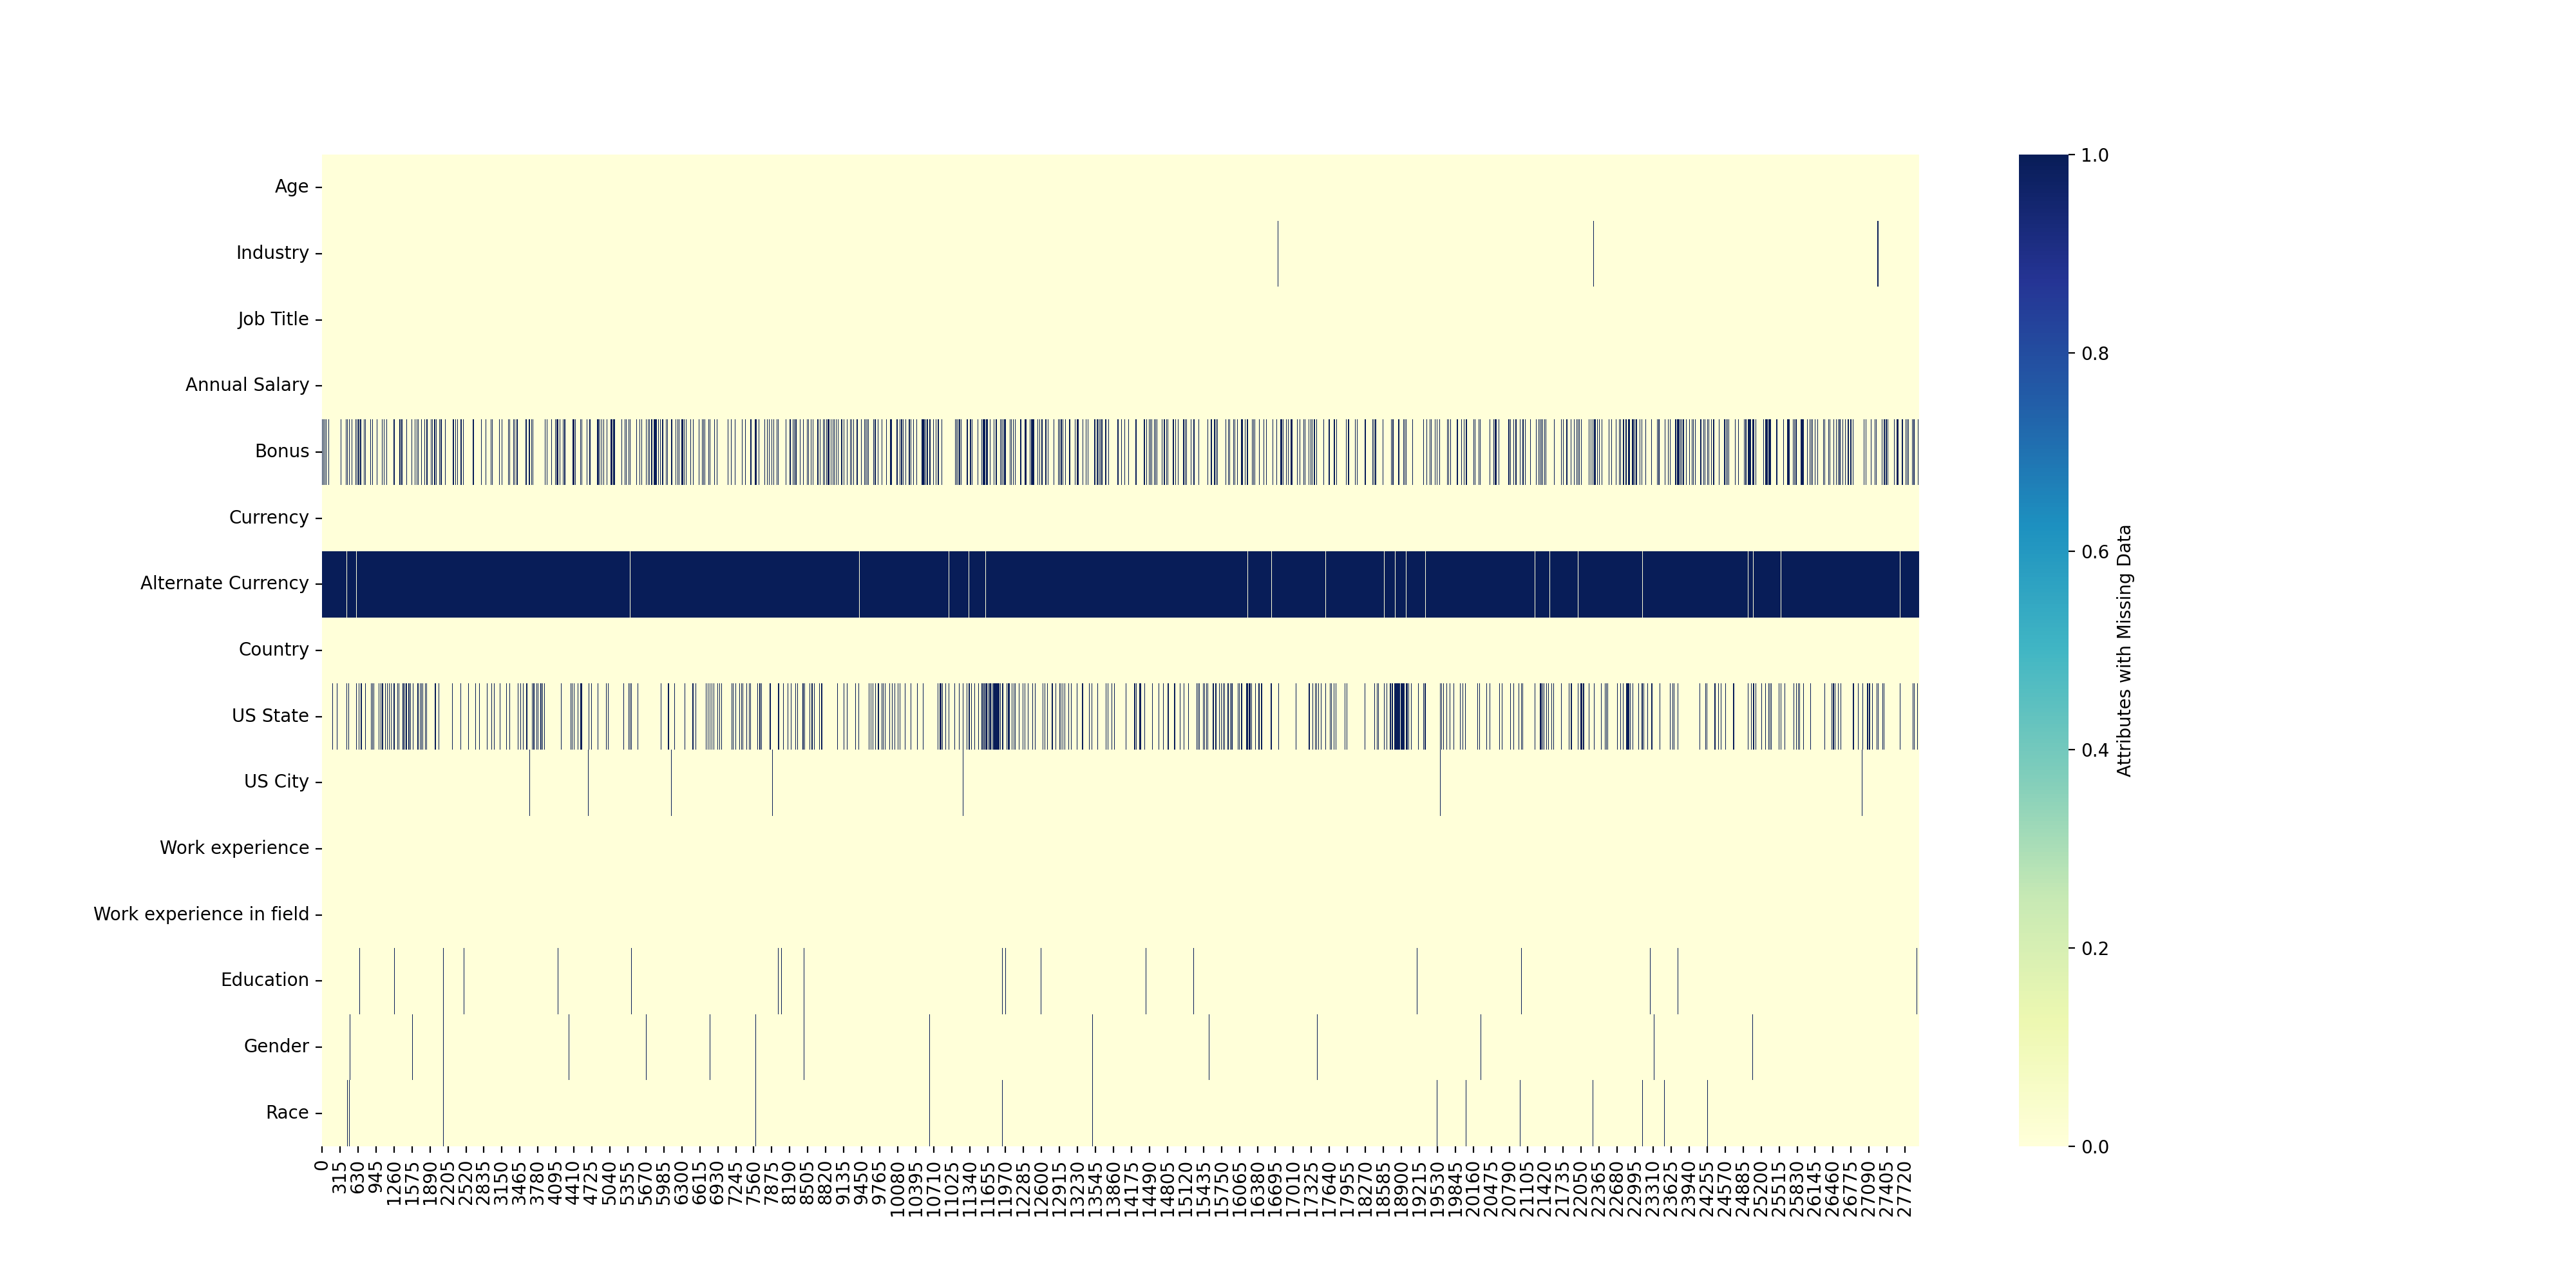

In [438]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Attributes with Missing Data'}) 

### Chosing Attributes/Columns to Drop Non-Values
**NA values** are dropped from some columns, such as `Annual Salary`, `Education`, `Race`, and `Gender`. This is because these columns or features  are useful for predictions and model creation, they cannot be used them if they are incomplete.

In [439]:
data.count()

Age                         27967
Industry                    27895
Job Title                   27967
Annual Salary               27967
Bonus                       20704
Currency                    27967
Alternate Currency            195
Country                     27967
US State                    22977
US City                     27888
Work experience             27967
Work experience in field    27967
Education                   27752
Gender                      27800
Race                        27798
dtype: int64

In [440]:
data.dropna(subset=["Annual Salary", "Education", "Race", "Gender"], inplace=True)

In [441]:
data.isna().sum()

Age                             0
Industry                       69
Job Title                       0
Annual Salary                   0
Bonus                        7082
Currency                        0
Alternate Currency          27333
Country                         0
US State                     4872
US City                        78
Work experience                 0
Work experience in field        0
Education                       0
Gender                          0
Race                            0
dtype: int64

In [442]:
data.count() # Ensure data in NA was removed

Age                         27521
Industry                    27452
Job Title                   27521
Annual Salary               27521
Bonus                       20439
Currency                    27521
Alternate Currency            188
Country                     27521
US State                    22649
US City                     27443
Work experience             27521
Work experience in field    27521
Education                   27521
Gender                      27521
Race                        27521
dtype: int64

### Data Imputing and Feature Engineering
The `Annual Salary` column which will serve as the label or outcome variable is of type `string` which is not ideal for carrying out mathematical operations. So the type needs to be changed from `string` to `numeric` type.

Also **NA** values in `Bonus` column are imputed with 0, since this will be added to the `Annual Salary` column. 

A new column `Total` was created as a sum of  `Annual Salary` and `Bonus`. Subsequently, these columns are dropped since they are no longer needed.

In [443]:
# The type for Annual Salary is string, 
data["Annual Salary"] = data["Annual Salary"].apply(lambda f: float(f.split()[0].replace(',', '')))
data["Annual Salary"] = data["Annual Salary"].astype(float)

In [444]:
# Now we need to change the NaN values from Bonus to 0
data["Bonus"] = data["Bonus"].fillna(0)
data["Total earnings"] = data["Annual Salary"] + data["Bonus"]

In [445]:
# Drop Bonus and Annual Salary columns
data.drop(["Annual Salary", "Bonus"], axis = 1, inplace=True)

In [446]:
data.sample(5)

,Age,Industry,Job Title,Currency,Alternate Currency,Country,US State,US City,Work experience,Work experience in field,Education,Gender,Race,Total earnings
22374,45-54,Government and Public Administration,Contract manager,USD,NaN,USA,New York,Albany,8 - 10 years,8 - 10 years,Some college,Other or prefer not to answer,White,68500.0
3323,25-34,Education (Primary/Secondary),Media Assistant,USD,NaN,United States,Indiana,Fort Wayne,5-7 years,2 - 4 years,College degree,Woman,White,29120.0
14933,25-34,Recruitment or HR,Coordination Business Partner,USD,NaN,United States,Massachusetts,Boston,8 - 10 years,5-7 years,Master's degree,Woman,White,68000.0
3753,35-44,Computing or Tech,Senior Executive Assistant,USD,NaN,United States,California,San Francisco,5-7 years,5-7 years,College degree,Woman,White,132000.0
17365,25-34,Health care,Medical Assistant,USD,NaN,United States,Connecticut,West Hartford,5-7 years,2 - 4 years,College degree,Woman,White,32650.0


In [447]:
data.count()

Age                         27521
Industry                    27452
Job Title                   27521
Currency                    27521
Alternate Currency            188
Country                     27521
US State                    22649
US City                     27443
Work experience             27521
Work experience in field    27521
Education                   27521
Gender                      27521
Race                        27521
Total earnings              27521
dtype: int64

**Messy Data from User Input**

Another challenge the data presents is that the observations use a **currency** in the `Alternate Currency` column. But this column allows for user input, which, as we know, makes the columns vunerable to the entry of messy data.

As can be seen in the above display below, the values are too varied, written not in currency code, and explanations instead of the currency. 

In [448]:
# I recommend to drop Alternate Currency 

In [449]:
data.drop(["Alternate Currency"], axis = 1, inplace=True)

In [450]:
data.count()

Age                         27521
Industry                    27452
Job Title                   27521
Currency                    27521
Country                     27521
US State                    22649
US City                     27443
Work experience             27521
Work experience in field    27521
Education                   27521
Gender                      27521
Race                        27521
Total earnings              27521
dtype: int64

In [451]:
data.head(5)

,Age,Industry,Job Title,Currency,Country,US State,US City,Work experience,Work experience in field,Education,Gender,Race,Total earnings
0,25-34,Education (Higher Education),Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0
1,25-34,Computing or Tech,Change & Internal Communications Manager,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,58600.0
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0
3,25-34,Nonprofits,Program Manager,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,65000.0
4,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,67000.0


In [452]:
### Distributions of Total Earnings by Different Age Groups

In [453]:
age_counts = data['Age'].value_counts()
age_counts

Age
25-34         12416
35-44          9731
45-54          3139
18-24          1159
55-64           974
65 or over       92
under 18         10
Name: count, dtype: int64

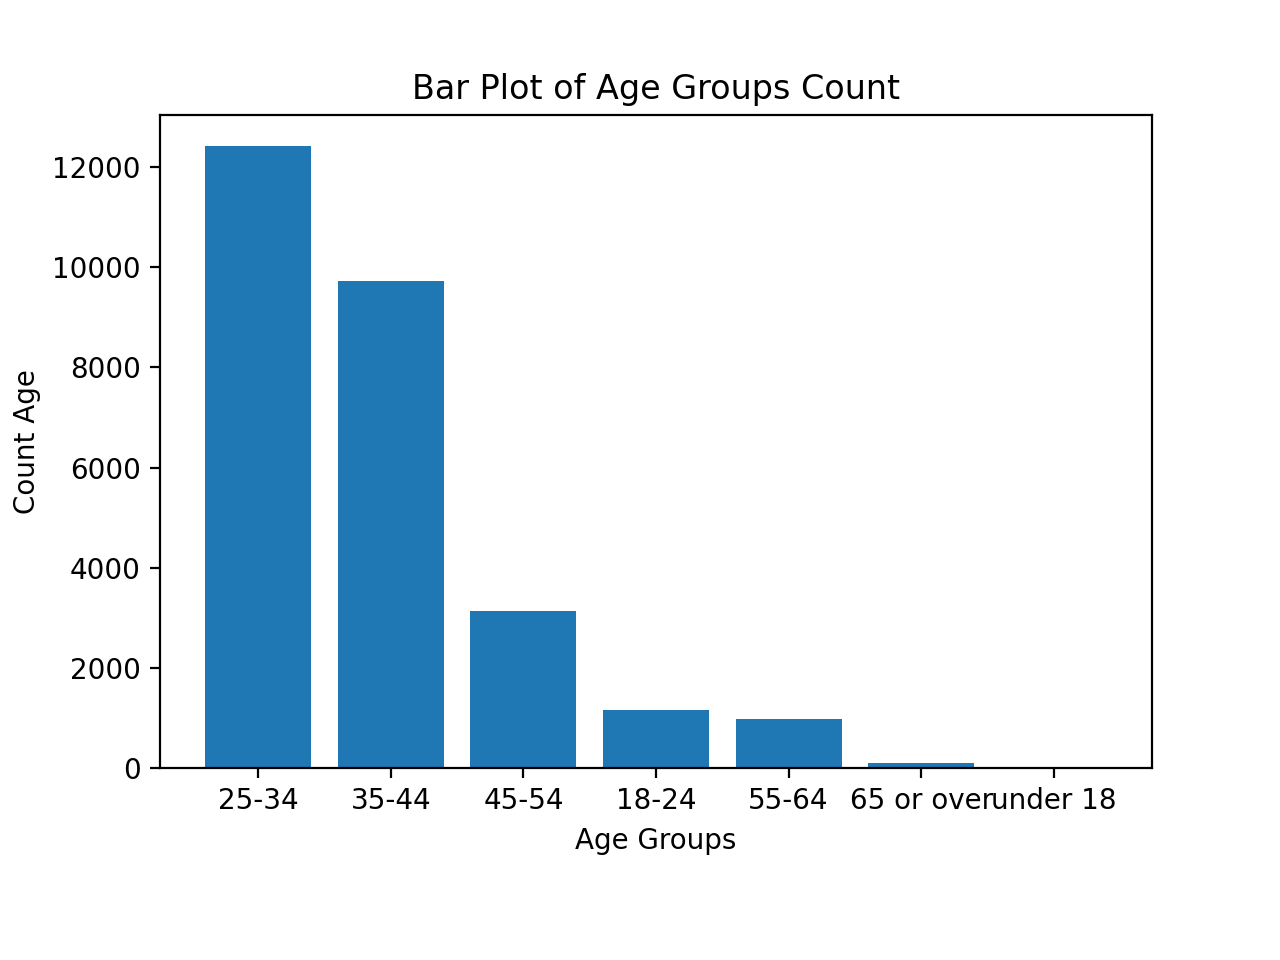

In [454]:
plt.bar(age_counts.index, age_counts.values)
plt.title('Bar Plot of Age Groups Count')
plt.xlabel("Age Groups")
plt.ylabel("Count Age")
plt.subplots_adjust(bottom=.2)
plt.show()

In [455]:
gender_counts = data['Gender'].value_counts()
gender_counts

Gender
Woman                            21126
Man                               5372
Non-binary                         739
Other or prefer not to answer      283
Prefer not to answer                 1
Name: count, dtype: int64

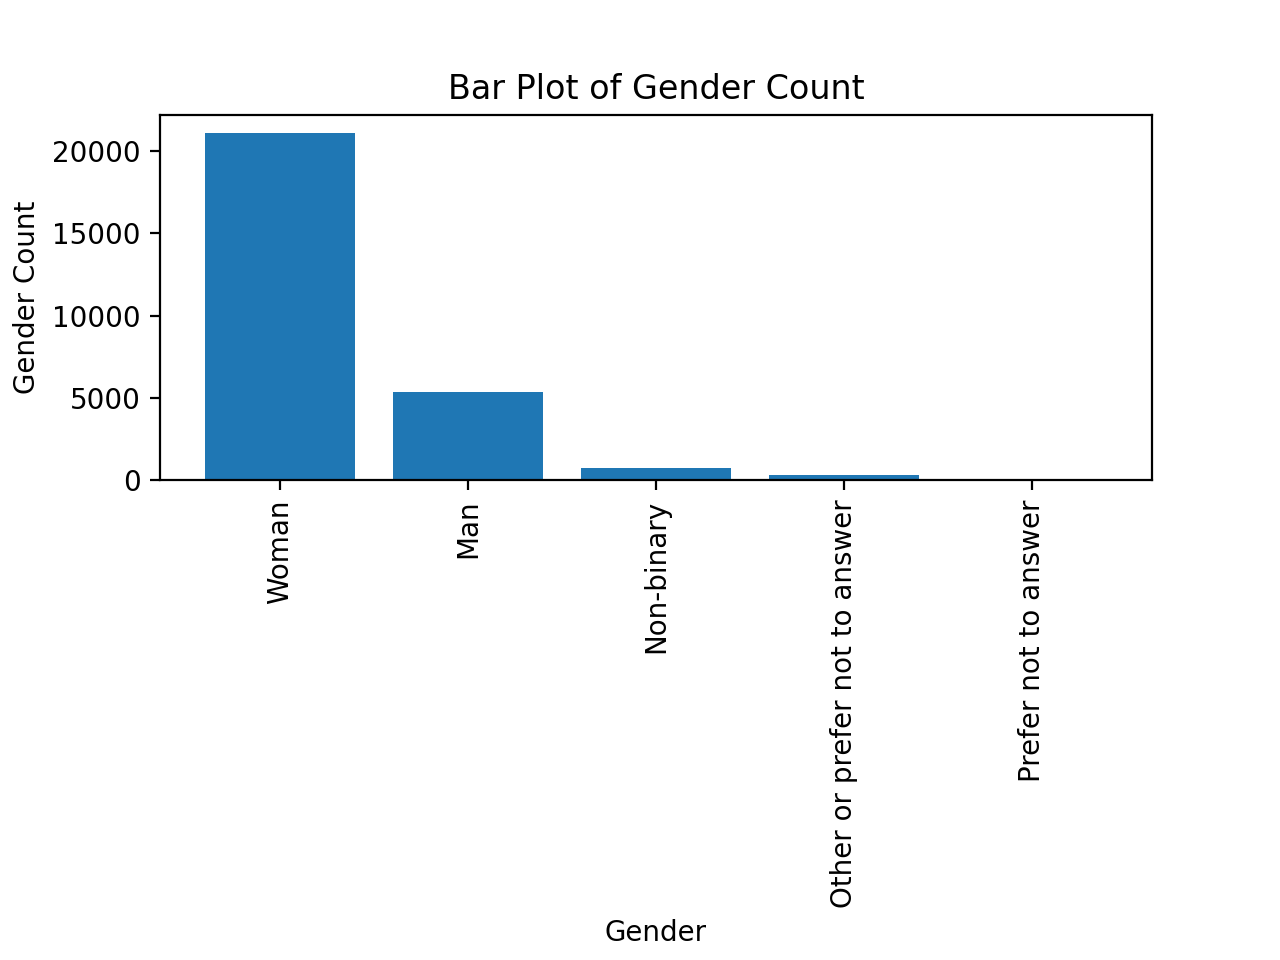

In [456]:
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Bar Plot of Gender Count')
plt.xlabel('Gender')
plt.ylabel('Gender Count')
plt.subplots_adjust(bottom=.5)
plt.xticks(rotation=90)
plt.show()

In [457]:
race_count = data['Race'].value_counts()

print(race_count)

Race
White                                                                                                                            22960
Asian or Asian American                                                                                                           1369
Black or African American                                                                                                          658
Another option not listed here or prefer not to answer                                                                             606
Hispanic, Latino, or Spanish origin                                                                                                587
Hispanic, Latino, or Spanish origin, White                                                                                         383
Asian or Asian American, White                                                                                                     340
Black or African American, White                  

In [458]:
# Unite values

data['Cleaned Race'] = data['Race']
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, White', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Native American or Alaska Native', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Another option not listed here or prefer not to answer', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Middle Eastern or Northern African, White', value='Middle Eastern or Northern African', inplace=True)
data['Cleaned Race'].replace(to_replace='Native American or Alaska Native, White', value='Native American or Alaska Native', inplace=True)
data['Cleaned Race'].replace(to_replace='White, Another option not listed here or prefer not to answer', value='White', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, Hispanic, Latino, or Spanish origin', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Another option not listed here or prefer not to answer', value='Other or Prefer Not to Answer', inplace=True)

data['Cleaned Race'].replace(to_replace='Asian or Asian American, Hispanic, Latino, or Spanish origin, White', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Hispanic, Latino, or Spanish origin', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Black or African American', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Middle Eastern or Northern African', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Black or African American, White', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, White, Another option not listed here or prefer not to answer', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Native American or Alaska Native, White', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Hispanic, Latino, or Spanish origin, White, Another option not listed here or prefer not to answer', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Hispanic, Latino, or Spanish origin ', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, White', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Native American or Alaska Native', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Black or African American, Native American or Alaska Native, White', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Middle Eastern or Northern African, White', value='Asian or Asian American', inplace=True)
data['Cleaned Race'].replace(to_replace='Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin', value='Asian or Asian American', inplace=True)

data['Cleaned Race'].replace(to_replace='Black or African American, Hispanic, Latino, or Spanish origin, White', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, Native American or Alaska Native, White', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, Middle Eastern or Northern African, White', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, Another option not listed here or prefer not to answer', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, Middle Eastern or Northern African', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, Middle Eastern or Northern African, Native American or Alaska Native, White', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, White', value='Black or African American', inplace=True)
data['Cleaned Race'].replace(to_replace='Black or African American, Middle Eastern or Northern African, Native American or Alaska Native, White', value='Black or African American', inplace=True)

data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, White', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Native American or Alaska Native, Another option not listed here or prefer not to answer', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, White, Another option not listed here or prefer not to answer', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', value='Hispanic, Latino, or Spanish origin', inplace=True)
data['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer', value='Hispanic, Latino, or Spanish origin', inplace=True)

data['Cleaned Race'].replace(to_replace='Middle Eastern or Northern African, White, Another option not listed here or prefer not to answer', value='Middle Eastern or Northern African', inplace=True)
data['Cleaned Race'].replace(to_replace='Middle Eastern or Northern African, Native American or Alaska Native, White', value='Middle Eastern or Northern African', inplace=True)
data['Cleaned Race'].replace(to_replace='Middle Eastern or Northern African, Native American or Alaska Native', value='Middle Eastern or Northern African', inplace=True)

data['Cleaned Race'].replace(to_replace='Native American or Alaska Native, White, Another option not listed here or prefer not to answer', value='Native American or Alaska Native', inplace=True)
data['Cleaned Race'].replace(to_replace='Native American or Alaska Native, Another option not listed here or prefer not to answer', value='Native American or Alaska Native', inplace=True)


data['Cleaned Race'].value_counts()

Cleaned Race
White                                  23024
Asian or Asian American                 1786
Hispanic, Latino, or Spanish origin     1004
Black or African American                838
Other or Prefer Not to Answer            606
Middle Eastern or Northern African       153
Native American or Alaska Native         110
Name: count, dtype: int64

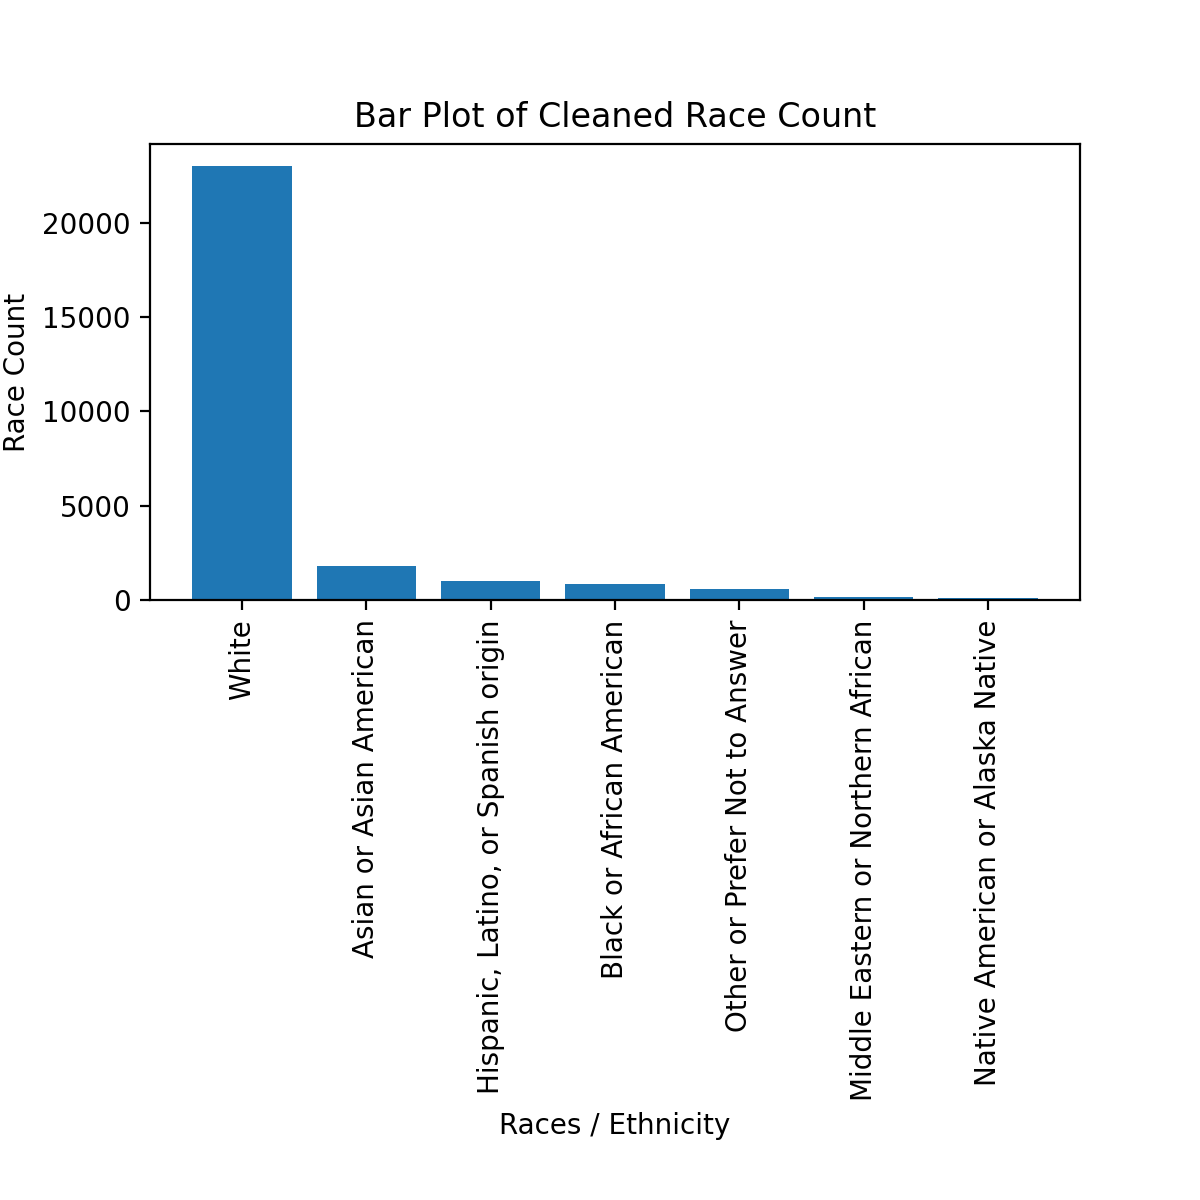

In [459]:
# Bar plot
plt.figure(figsize=(6,6))
cleaned_race_count = data['Cleaned Race'].value_counts()
plt.bar(cleaned_race_count.index, cleaned_race_count.values)
plt.title('Bar Plot of Cleaned Race Count')
plt.xlabel('Races / Ethnicity')
plt.ylabel('Race Count')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=.5)
plt.show()

**Job Title Data Cleaning and Imputing**

Job Title, is another user-input field that is frought with messy data that needs to be cleaned and imputed with appropriate values. All **Job Titles** with a count of 1 are put together and imputed as `OTHER` in the `Job Title` column of the **data** dataframe.

In [460]:
data["Job Title"] = data["Job Title"].str.upper()
data["Job Title"] = data["Job Title"].str.strip()
data.loc[data["Job Title"].str.contains("EXEC"), "Job Title"] = "EXECUTIVE"
data.loc[data["Job Title"].str.contains("CONSULTANT"), "Job Title"] = "CONSULTANT"
data.loc[data["Job Title"].str.contains("TEACH"), "Job Title"] = "TEACHER"
data.loc[data["Job Title"].str.contains("MANAGER")|
      data["Job Title"].str.contains("ADMIN"), "Job Title"] = "MANAGER"
data.loc[data["Job Title"].str.contains("ACCOUNTANT"), "Job Title"] = "ACCOUNTANT"
data.loc[data["Job Title"].str.contains("SPECIALIST"), "Job Title"] = "SPECIALIST"
data.loc[data["Job Title"].str.contains("ANALYST"), "Job Title"] = "ANALYST"
data.loc[data["Job Title"].str.contains("ASSOCIATE"), "Job Title"] = "ASSOCIATE"
data.loc[data["Job Title"].str.contains("LEGAL"), "Job Title"] = "LEGAL"
data.loc[data["Job Title"].str.contains("ASSISTANT"), "Job Title"] = "ASSISTANT"
data.loc[data["Job Title"].str.contains("ARTIST"), "Job Title"] = "ARTIST"
data.loc[data["Job Title"].str.contains("ADVISOR"), "Job Title"] = "ADVISOR"
data.loc[data["Job Title"].str.contains("RESEARCH")|
      data["Job Title"].str.contains("R&D")|
      data["Job Title"].str.contains("SCIENTIST"), "Job Title"] = "RESEARCH"
data.loc[data["Job Title"].str.contains("LEAD"), "Job Title"] = "LEAD"
data.loc[data["Job Title"].str.contains("SOFTWARE")|
      data["Job Title"].str.contains("DEVELOPER"), "Job Title"] = "SWE"
data.loc[data["Job Title"].str.contains("ENGI"), "Job Title"] = "ENGINEER"

def group_other_jobs(job_title):
      job_title_list = ['EXECUTIVE', 'CONSULTANT', 'TEACHER', 
                  'MANAGER', 'ACCOUNTANT', 'SPECIALIST', 
                  'ANALYST', 'ASSOCIATE', 'LEGAL', 
                  'ASSISTANT', 'ARTIST', 'ADVISOR', 
                  'RESEARCH', 'LEAD', 'SWE', 'ENGINEER']
    
      for keyword in job_title_list:
            if keyword in job_title:
                  return job_title

      return 'Other'


data['Job Title'] = data['Job Title'].apply(group_other_jobs)

In [461]:
data['Job Title'].value_counts()

Job Title
Other                 10329
MANAGER                6096
ANALYST                1633
SWE                    1397
ENGINEER               1267
ASSOCIATE              1155
SPECIALIST             1134
ASSISTANT               962
RESEARCH                674
EXECUTIVE               602
CONSULTANT              537
TEACHER                 499
LEAD                    484
LEGAL                   251
ADVISOR                 247
ACCOUNTANT              227
ARTIST                   26
DESIGNER, SWEATERS        1
Name: count, dtype: int64

In [462]:
data["Job Title"].value_counts()

Job Title
Other                 10329
MANAGER                6096
ANALYST                1633
SWE                    1397
ENGINEER               1267
ASSOCIATE              1155
SPECIALIST             1134
ASSISTANT               962
RESEARCH                674
EXECUTIVE               602
CONSULTANT              537
TEACHER                 499
LEAD                    484
LEGAL                   251
ADVISOR                 247
ACCOUNTANT              227
ARTIST                   26
DESIGNER, SWEATERS        1
Name: count, dtype: int64

In [463]:
frame = {"Job Title":data["Job Title"].unique(),
         "count":data["Job Title"].value_counts()}
         
temp = pd.DataFrame(frame)
# Filter out jobs with only 1 occurrence and store them in a list
jobs_to_other = temp[temp["count"]==1]["Job Title"].tolist()

# Replace all single-occurrence jobs with 'OTHER'
data.loc[data["Job Title"].isin(jobs_to_other), "Job Title"] = "OTHER"

In [464]:
data["Job Title"].value_counts()

Job Title
Other         10329
MANAGER        6096
ANALYST        1633
SWE            1397
ENGINEER       1267
ASSOCIATE      1155
SPECIALIST     1134
ASSISTANT       962
RESEARCH        674
EXECUTIVE       602
CONSULTANT      537
TEACHER         499
LEAD            484
LEGAL           251
ADVISOR         247
ACCOUNTANT      227
ARTIST           26
OTHER             1
Name: count, dtype: int64

**Dealing with Alternate Currencies**

Having cleaned the data up to this point, we now perform the exchange rate computation between `Alternate Currencies` and `USD`.

In [465]:
key = "c43e42e958c4b9df95f29ec3"
url = "https://v6.exchangerate-api.com/v6/" + key + "/pair/"#+ "/latest/USD"
print(alt_cur)
ex_rat = {}
for ac in alt_cur:
    #break
    s = url + ac + "/USD"
    r = requests.get(s)#.json()["conversion_rate"]
    #print(r)
    rjson = r.json()
    #print(rjson)
    c = rjson["conversion_rate"]
    #print(c)
    ex_rat[ac] = c

NameError: name 'alt_cur' is not defined

In [ ]:
for i in data.index: 
    data["Total"][i] = data["Total"][i] * ex_rat[data["Alternate Currency"][i]]
data.loc[data["Alternate Currency"] == "USD"]

KeyError: 'Total'

**Cleaning the Country Column**

The Country column is another free-entry column that contain inconsistent and messy data and required cleaning. All entries were converted to uppercase to deal with differences in case for the entries. The column values were then imputed with values that the team deemed appropriate after careful examination of all observations. We made use of the `str` *contains()* method to deal with inconsistent country entries. 

In [466]:
data["Country"] = data["Country"].str.upper()
data["Country"] = data["Country"].str.strip()
data.loc[data["Country"].str.contains("ARGENTINA"), "Country"] = "ARGENTINA"
data.loc[data["Country"].str.contains("CHINA"), "Country"] = "CHINA"
data.loc[data["Country"].str.contains("U.S.A") | 
      data["Country"].str.contains("USA") |
      data["Country"].str.contains("UNITED STATES")|
      data["Country"].str.match("US"), "Country"] = "USA"
data.loc[data["Country"].str.contains("AUSTRALIA"), "Country"] = "AUSTRALIA"
data.loc[data["Country"].str.contains("CZECH"), "Country"] = "CZECH REPUBLIC"
data.loc[data["Country"].str.contains("XICO"), "Country"] = "MEXICO"
data.loc[data["Country"].str.contains("BRAZIL") |
      data["Country"].str.contains("BRASIL"), "Country"] = "BRAZIL"

**Deleting Redundant Columns**

Since every observation is now in the same currency, we can get rid of the `Currency` and `Alternate Currency` columns.

`US State`, `US City` can be dropped, as these values are just too varied and are, indeed, not likely to country much to the analsis since earnings are compared accross multiple countries.

In [467]:
data.drop(columns=["Currency", "US State", "US City", "Race"], inplace=True)
data.sample(5)

,Age,Industry,Job Title,Country,Work experience,Work experience in field,Education,Gender,Total earnings,Cleaned Race
5465,35-44,Government and Public Administration,ANALYST,USA,11 - 20 years,11 - 20 years,College degree,Woman,131000.0,White
3530,35-44,Business or Consulting,LEAD,USA,11 - 20 years,11 - 20 years,College degree,Woman,109050.0,White
18712,35-44,Business or Consulting,Other,NETHERLANDS,21 - 30 years,21 - 30 years,Master's degree,Man,78000.0,White
16470,35-44,Computing or Tech,SWE,USA,11 - 20 years,8 - 10 years,College degree,Man,164800.0,White
12936,45-54,Property or Construction,Other,USA,11 - 20 years,11 - 20 years,Master's degree,Woman,77500.0,White


In [468]:
data.columns

Index(['Age', 'Industry', 'Job Title', 'Country', 'Work experience',
       'Work experience in field', 'Education', 'Gender', 'Total earnings',
       'Cleaned Race'],
      dtype='object')

In [ ]:
######

### NOTE:
We can also create income brackets, which would turn our only numerical label into a categorical label. 
For the brackets, the tax brackets for income in the United States were used
**data["Total"] = pd.cut(data["Total"], [0,11000, 44725, 95375, 182100, 231250, 578125 ,float("inf")])
data.Total.value_counts()**

This will be done during the **modeling phase** of the project. For now, the Total value is left as a *float* type.

# Exploratory Analysis of the Cleaned Data

Now that the data is in a consistent state, we carry out a bit more exploration of the data for better understanding before starting the **modeling phase**.

The first observation we make, as evidenced below, is that most fields are categorical, with only `Total` column being numerical. 

This is because the categories that could be numerical or boolean, such as `Age` and `Gender`, include a window for different values, and for Gender, there is the possibility to include non-binary genders. 

In [ ]:
data.Country.value_counts()

Country
USA                        22035
CANADA                      1645
UK                           681
UNITED KINGDOM               619
U.S.                         591
                           ...  
UNITEED STATES                 1
AFGHANISTAN                    1
VIRGINIA                       1
JERSEY, CHANNEL ISLANDS        1
CANADÁ                         1
Name: count, Length: 216, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27521 entries, 0 to 27966
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       27521 non-null  object 
 1   Industry                  27452 non-null  object 
 2   Job Title                 27521 non-null  object 
 3   Country                   27521 non-null  object 
 4   Work experience           27521 non-null  object 
 5   Work experience in field  27521 non-null  object 
 6   Education                 27521 non-null  object 
 7   Gender                    27521 non-null  object 
 8   Total earnings            27521 non-null  float64
 9   Cleaned Race              27521 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.3+ MB


In [ ]:
### Total earnings

## Visualization
Here we give pictorial view of how cleaned data look like.

### Distributions of Total Earnings (Annual Salary + Bonus)

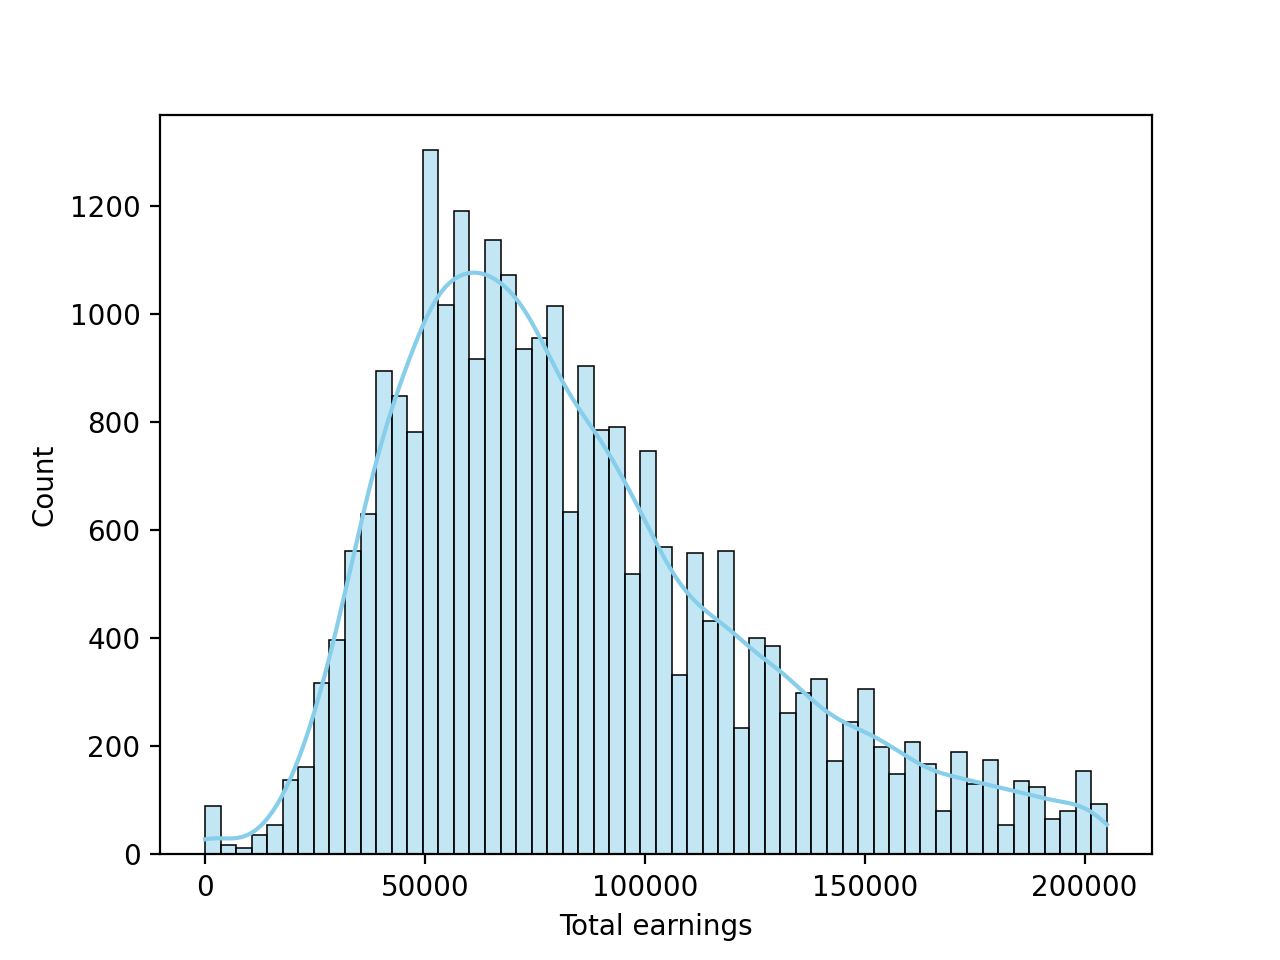

In [ ]:
Q1 = data["Total earnings"].quantile(0.25)
Q3 = data["Total earnings"].quantile(0.75)
IQR = Q3 - Q1
data_filtered = data[~((data["Total earnings"] < (Q1 - 1.5 * IQR)) |(data["Total earnings"] > (Q3 + 1.5 * IQR)))]
sns.histplot(data=data_filtered, x="Total earnings", color="skyblue", kde=True)
plt.show()


### Distributions of Total Earnings by Gender

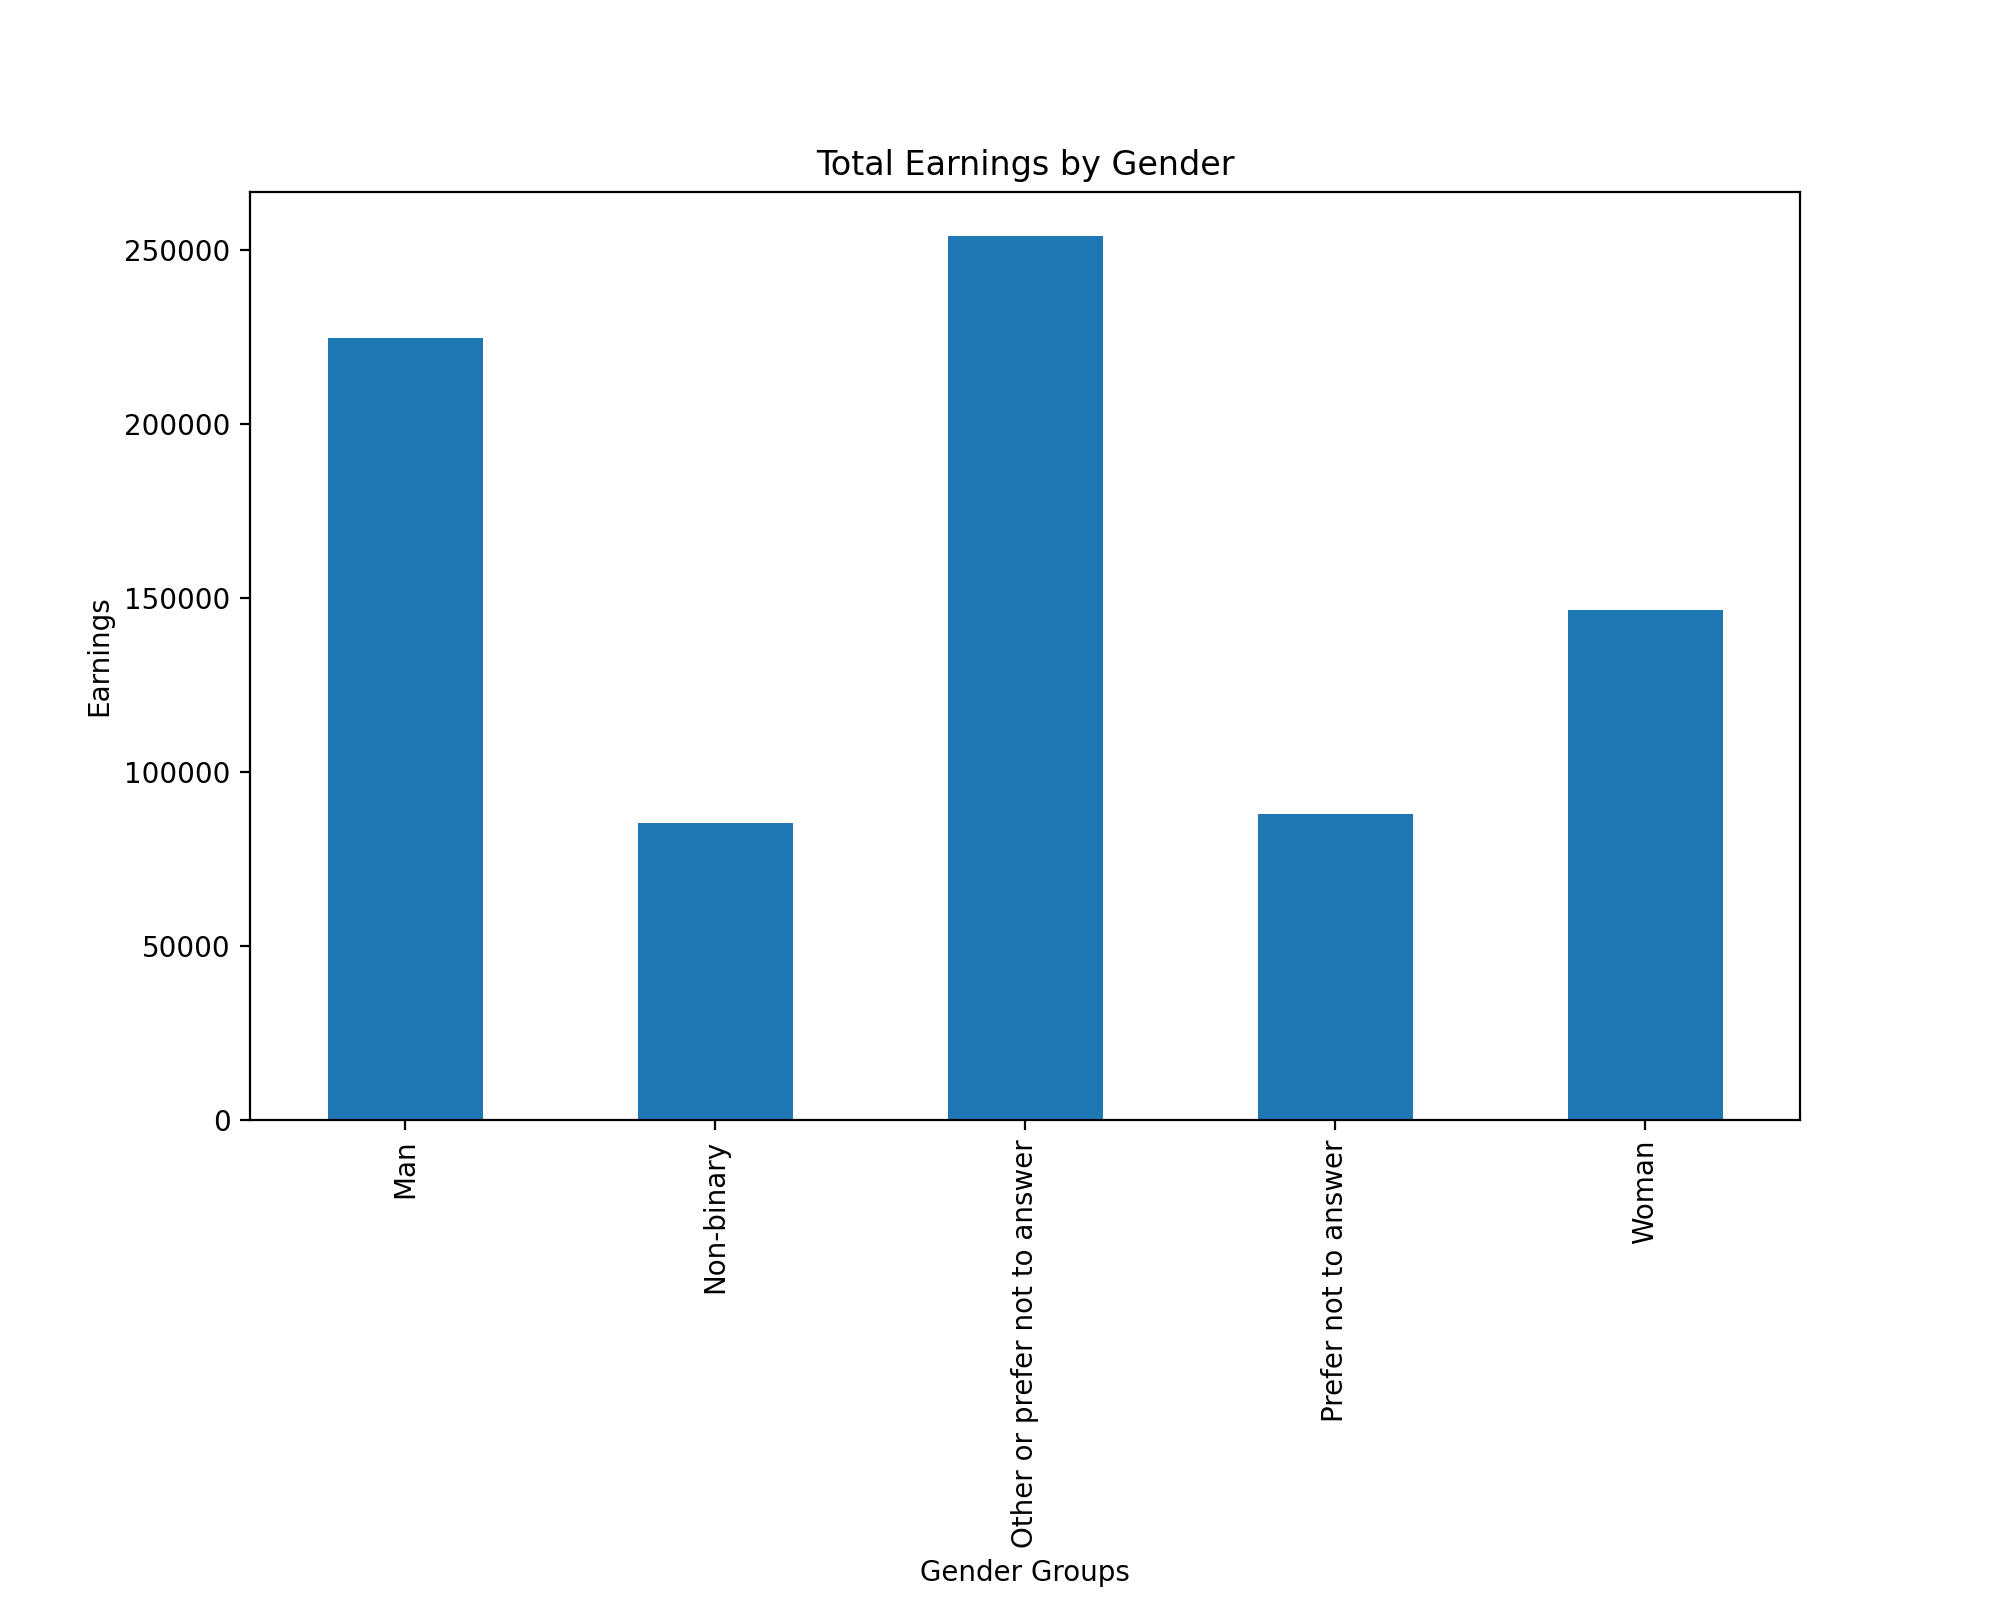

In [ ]:
gender_earnings = round(data.groupby("Gender")['Total earnings'].mean(),2)
gender_earnings.plot(kind='bar', figsize=(10, 8))
plt.subplots_adjust(bottom=.3)
plt.title('Total Earnings by Gender')
plt.xlabel("Gender Groups")
plt.ylabel("Earnings")
plt.show()

**Unadjusted Salary Gap Between Man & Woman**

In [ ]:
female_average_salary = np.mean(data[data['Gender']=="Woman"]['Total earnings'])
print(female_average_salary)

146432.1263372148


In [ ]:
male_average_salary = np.mean(data[data['Gender']=="Man"]['Total earnings'])
print(male_average_salary)

224661.7282204021


In [ ]:
print("Unadjusted Salary Gap: {:.2f}".format(female_average_salary-male_average_salary))

Unadjusted Salary Gap: -78229.60


*On the surface, the data show that women on average earn **USD78,229.60** more than than men.* This of does not take into consideration other gender preferences.

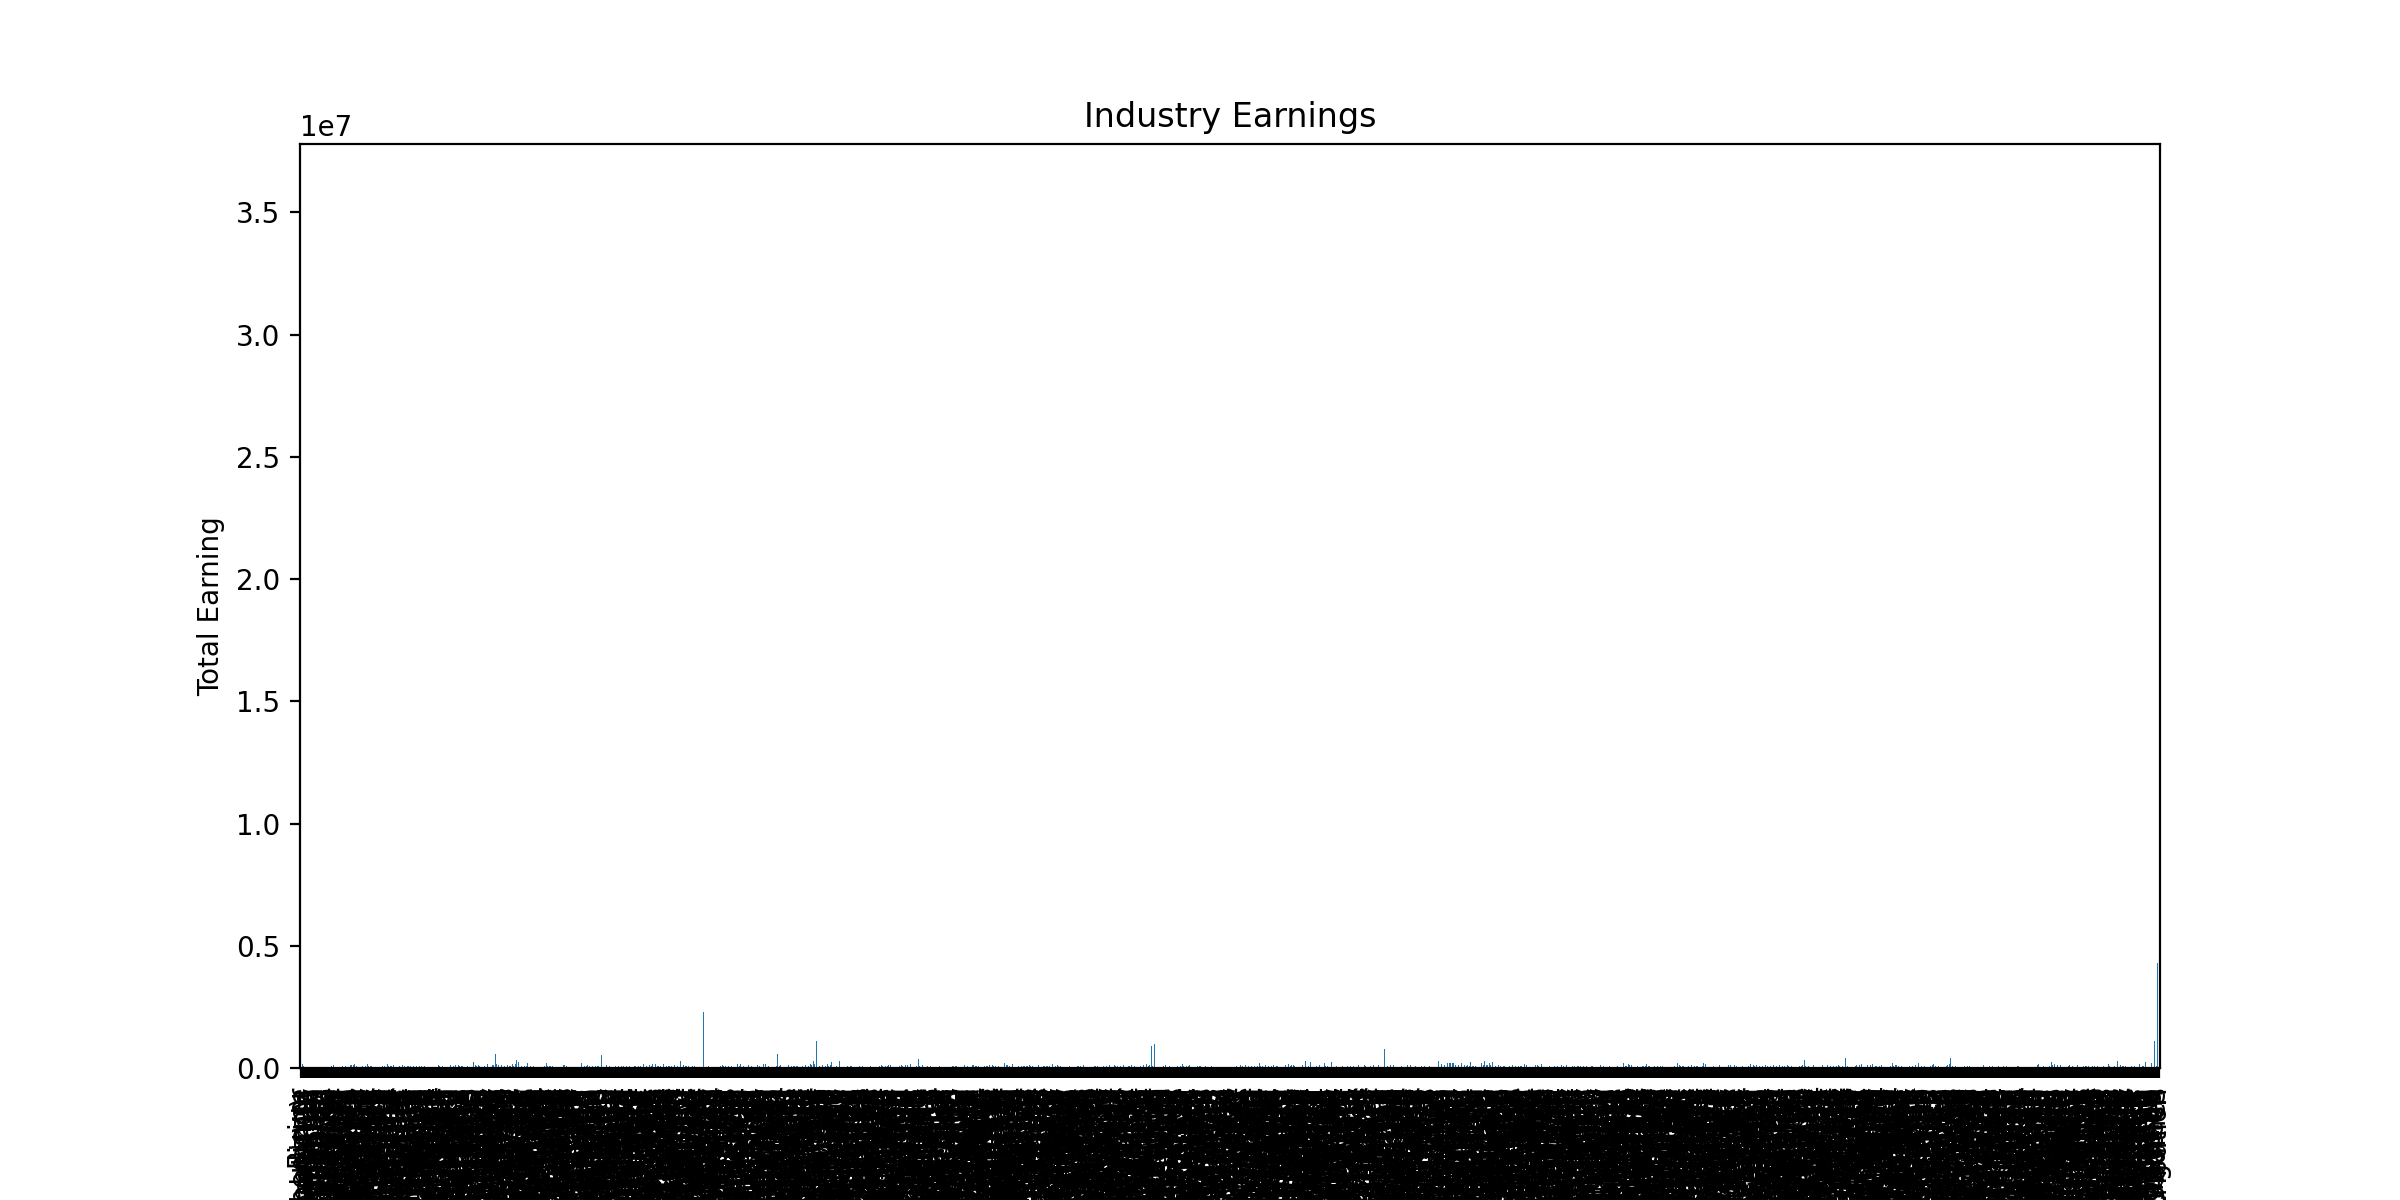

In [ ]:
### Too many industries

industry_earnings = round(data.groupby("Industry")['Total earnings'].mean(),2)

industry_earnings.plot(kind='bar',figsize=(12, 6)) 
plt.title('Industry Earnings') 
plt.xlabel('Industries') 
plt.ylabel('Total Earning') 
plt.show()

c:\Users\Ignacio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


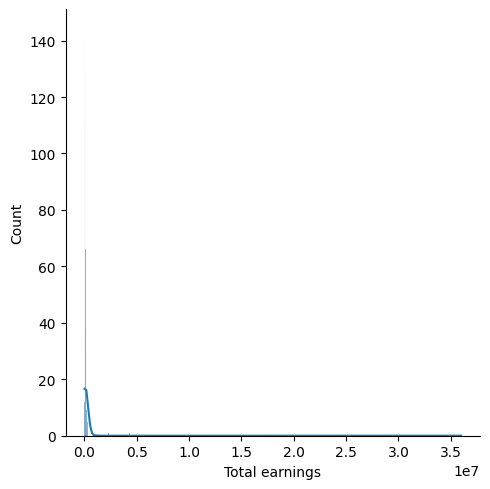

In [ ]:
sns.displot(industry_earnings,kde=True)

In [ ]:
data.head(5)

,Age,Industry,Job Title,Country,Work experience,Work experience in field,Education,Gender,Total earnings,Cleaned Race
0,25-34,Education (Higher Education),RESEARCH,USA,5-7 years,5-7 years,Master's degree,Woman,55000.0,White
1,25-34,Computing or Tech,MANAGER,UNITED KINGDOM,8 - 10 years,5-7 years,College degree,Non-binary,58600.0,White
2,25-34,"Accounting, Banking & Finance",SPECIALIST,USA,2 - 4 years,2 - 4 years,College degree,Woman,34000.0,White
3,25-34,Nonprofits,MANAGER,USA,8 - 10 years,5-7 years,College degree,Woman,65000.0,White
4,25-34,"Accounting, Banking & Finance",MANAGER,USA,8 - 10 years,5-7 years,College degree,Woman,67000.0,White


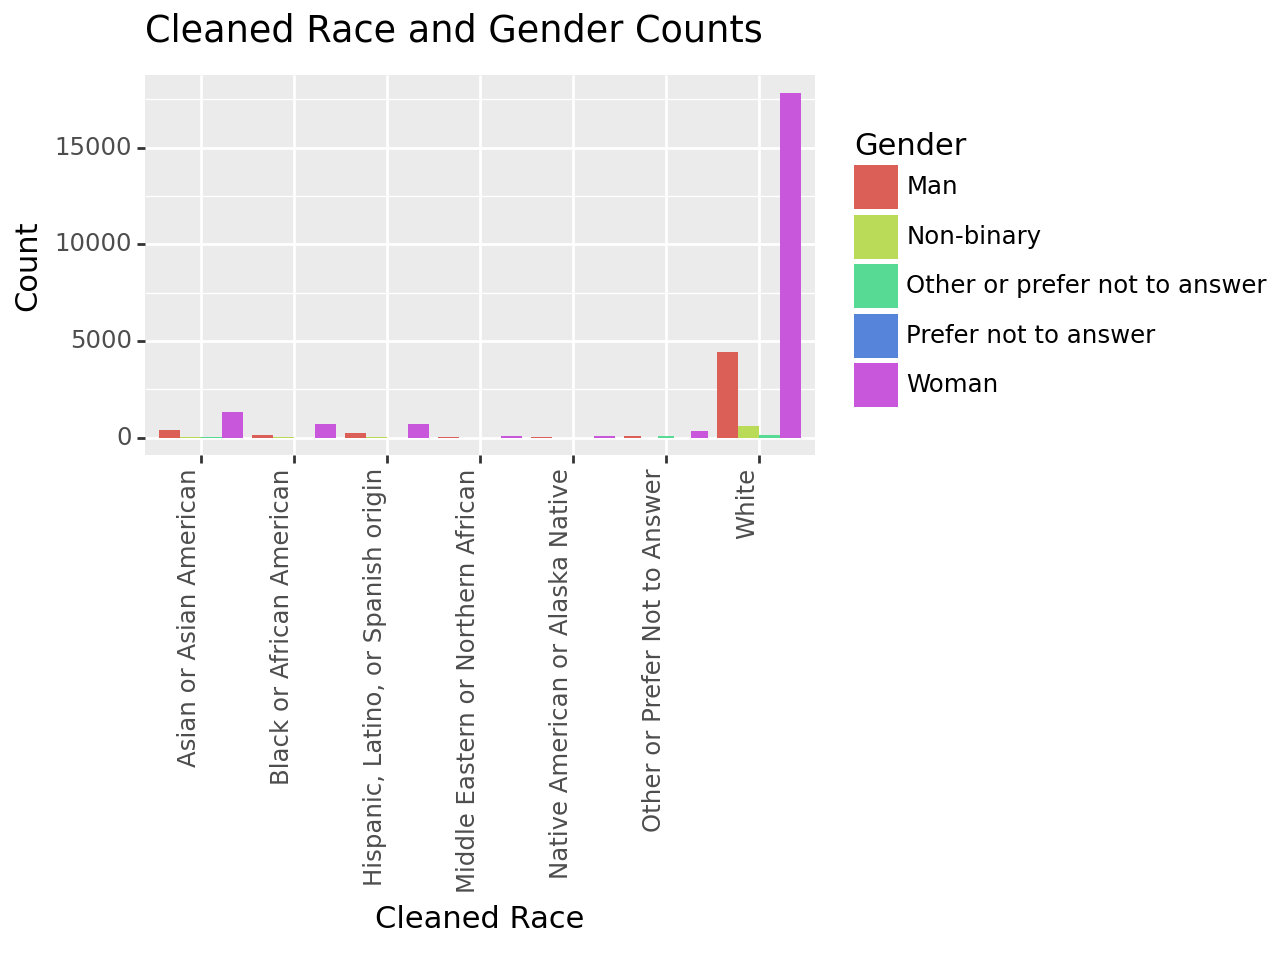

<Figure Size: (640 x 480)>

In [ ]:

race_gender_counts = data.groupby(['Cleaned Race', 'Gender']).size().reset_index(name="Count")


ggplot(data=race_gender_counts, mapping=aes(x='Cleaned Race', y='Count', fill='Gender')) + \
    geom_col(position='dodge') + \
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + \
    ggtitle("Cleaned Race and Gender Counts")


As we can see in both the plot and the previous method, most of the participants are Caucasian, followed by Asian. This may also present an issue with the creation of a model, as there is a strong bias for the data to take heavily into consideration both Caucasian and Asian races. 

In [ ]:
data.Country.value_counts()

Country
USA                        22035
CANADA                      1645
UK                           681
UNITED KINGDOM               619
U.S.                         591
                           ...  
UNITEED STATES                 1
AFGHANISTAN                    1
VIRGINIA                       1
JERSEY, CHANNEL ISLANDS        1
CANADÁ                         1
Name: count, Length: 216, dtype: int64

# Modelling

Now that the data has been cleaned, the next step is to use this clean data to create predictive models in order to be able to associate different variables, such as country of origin, race, gender, age, etc. 
In order to be able to use most algorithms, the data needs to be either numerical, or one-hot encoded.
Several models will be tried: 
* Nearest Neighbors Classification
* Random forest

In [ ]:
data.isna().sum()

Age                          0
Industry                    69
Job Title                    0
Country                      0
Work experience              0
Work experience in field     0
Education                    0
Gender                       0
Total earnings               0
Cleaned Race                 0
dtype: int64

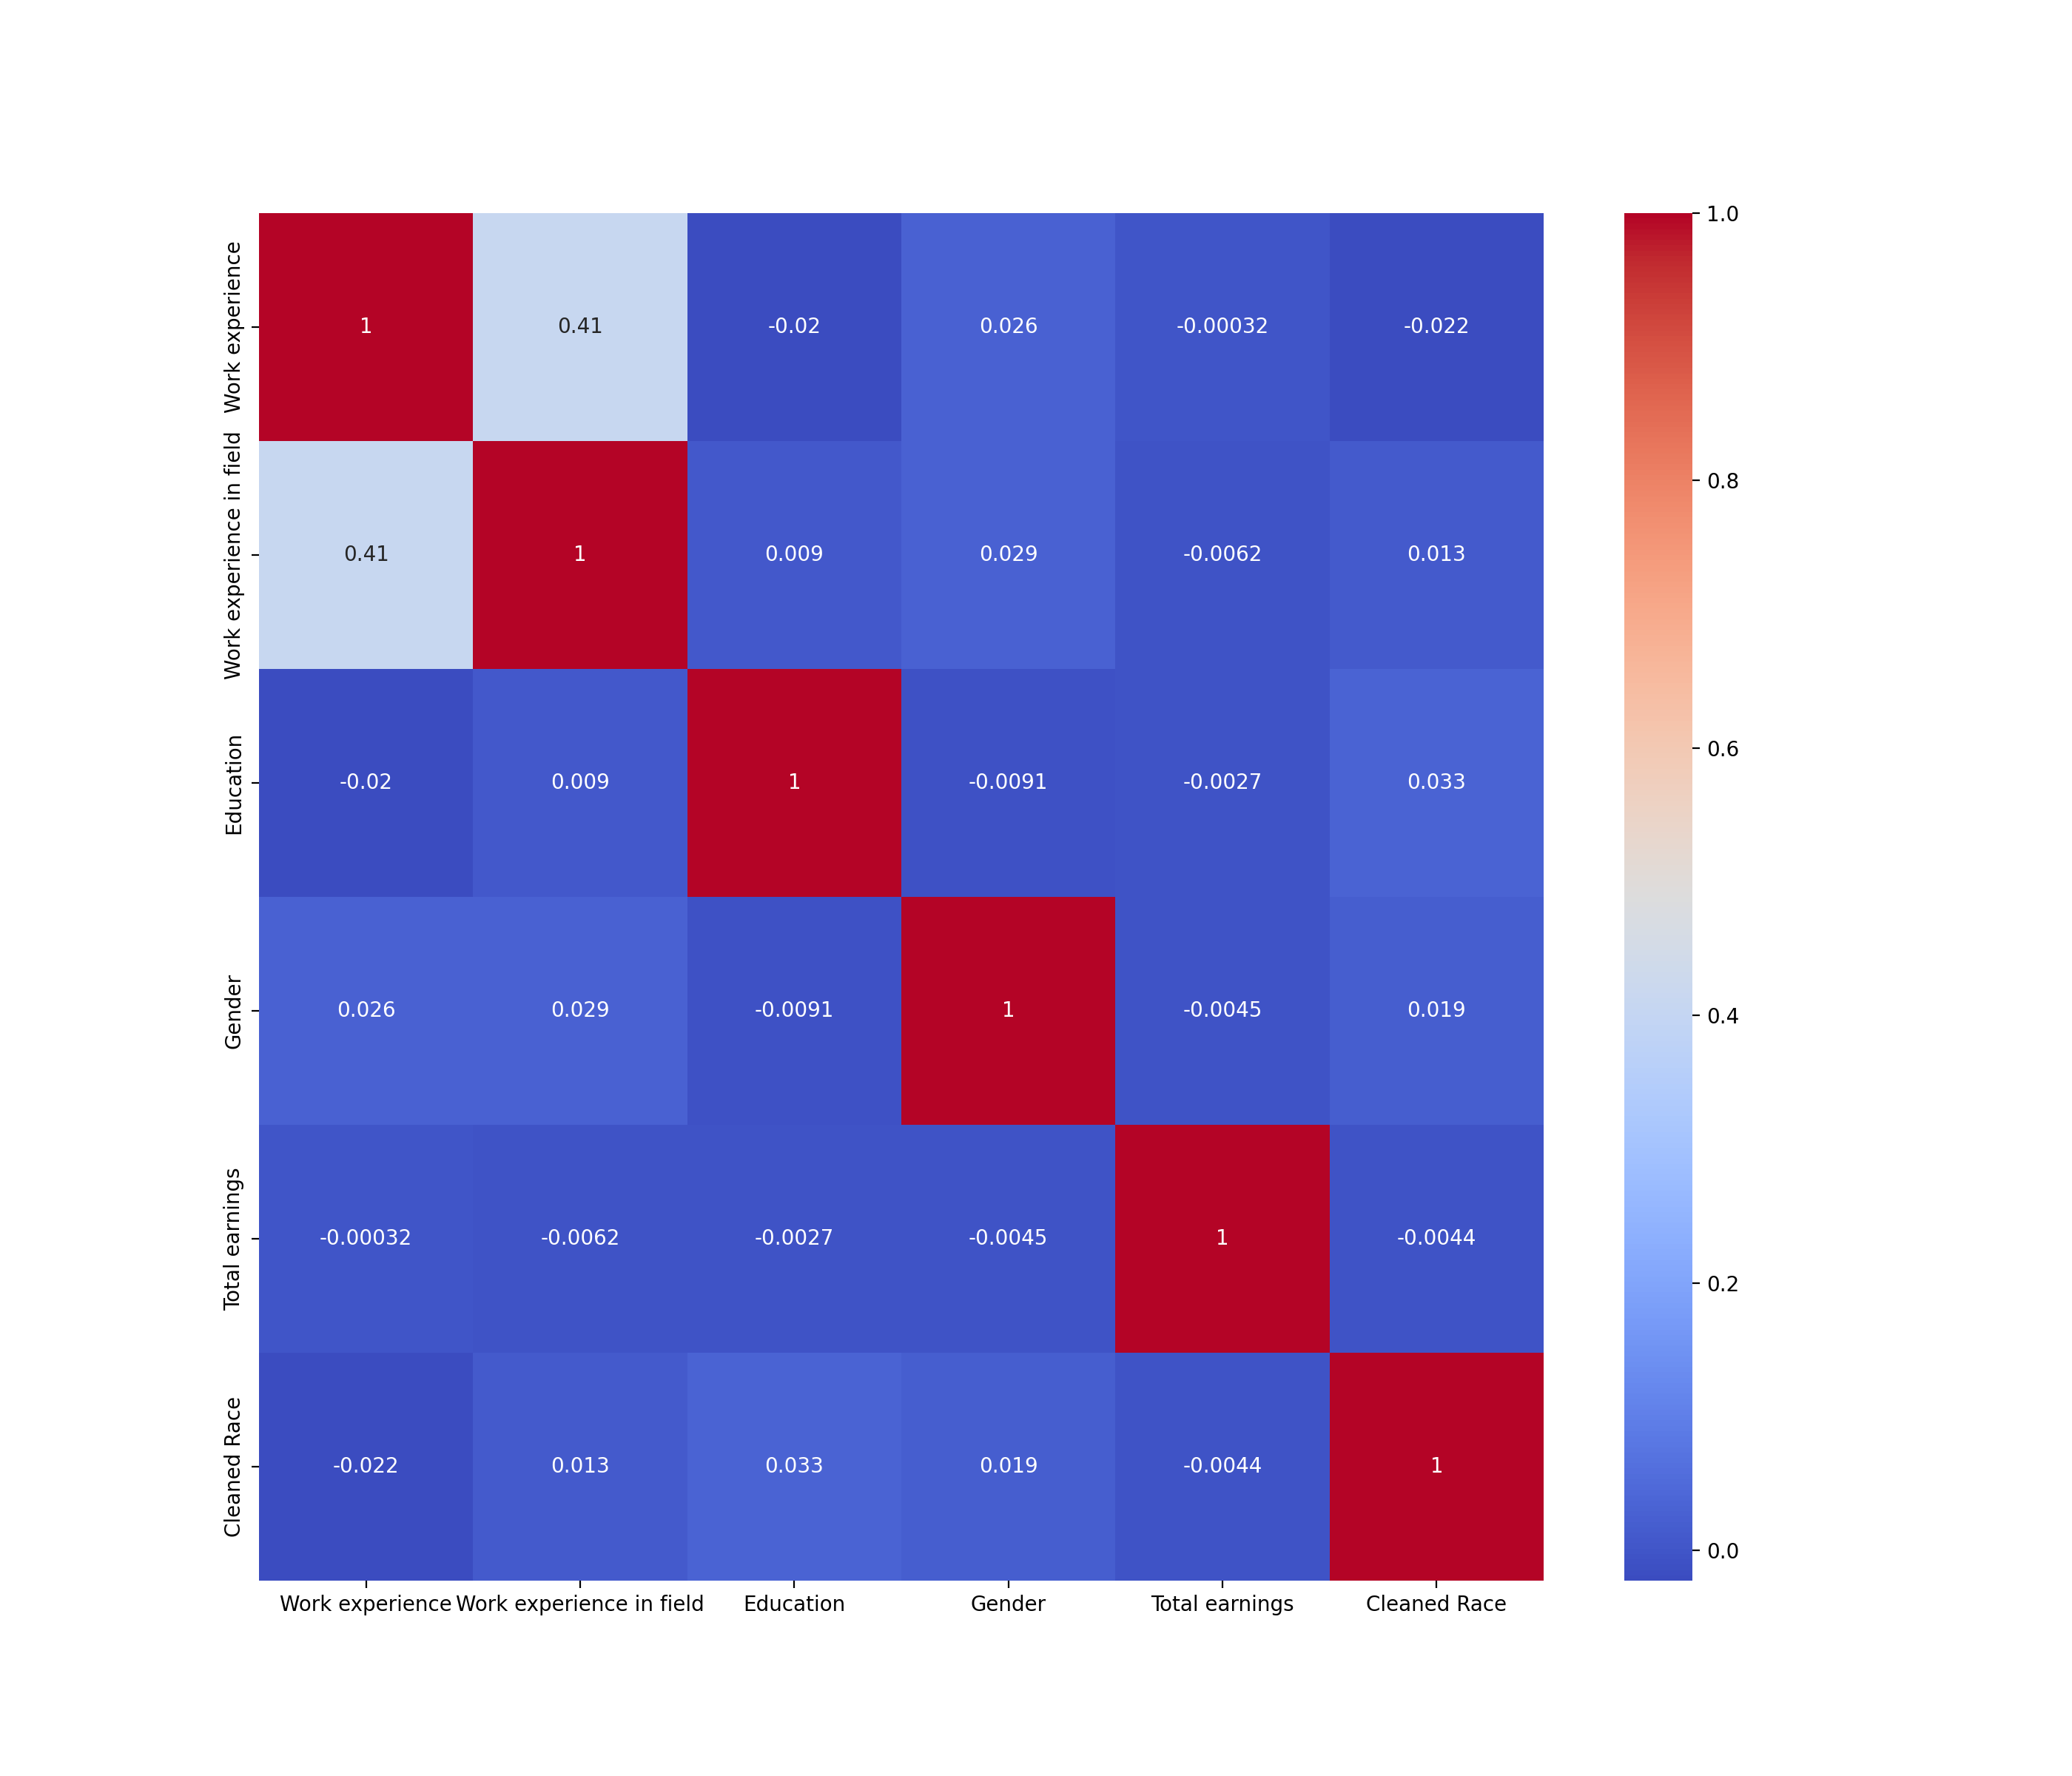

In [ ]:
data2 = data.copy()

le = LabelEncoder()
data2['Gender'] = le.fit_transform(data2['Gender'])
data2['Cleaned Race'] = le.fit_transform(data2['Cleaned Race'])
data2['Work experience'] = le.fit_transform(data2['Work experience'])
data2['Work experience in field'] = le.fit_transform(data2['Work experience in field'])
data2['Education'] = le.fit_transform(data2['Education'])

# Dropping the non-numeric columns
data2.drop(columns=['Age', 'Industry', 'Job Title', 'Country'], axis=1, inplace=True)

# Compute correlation matrix
correlation_matrix = data2.corr()

# Generate a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

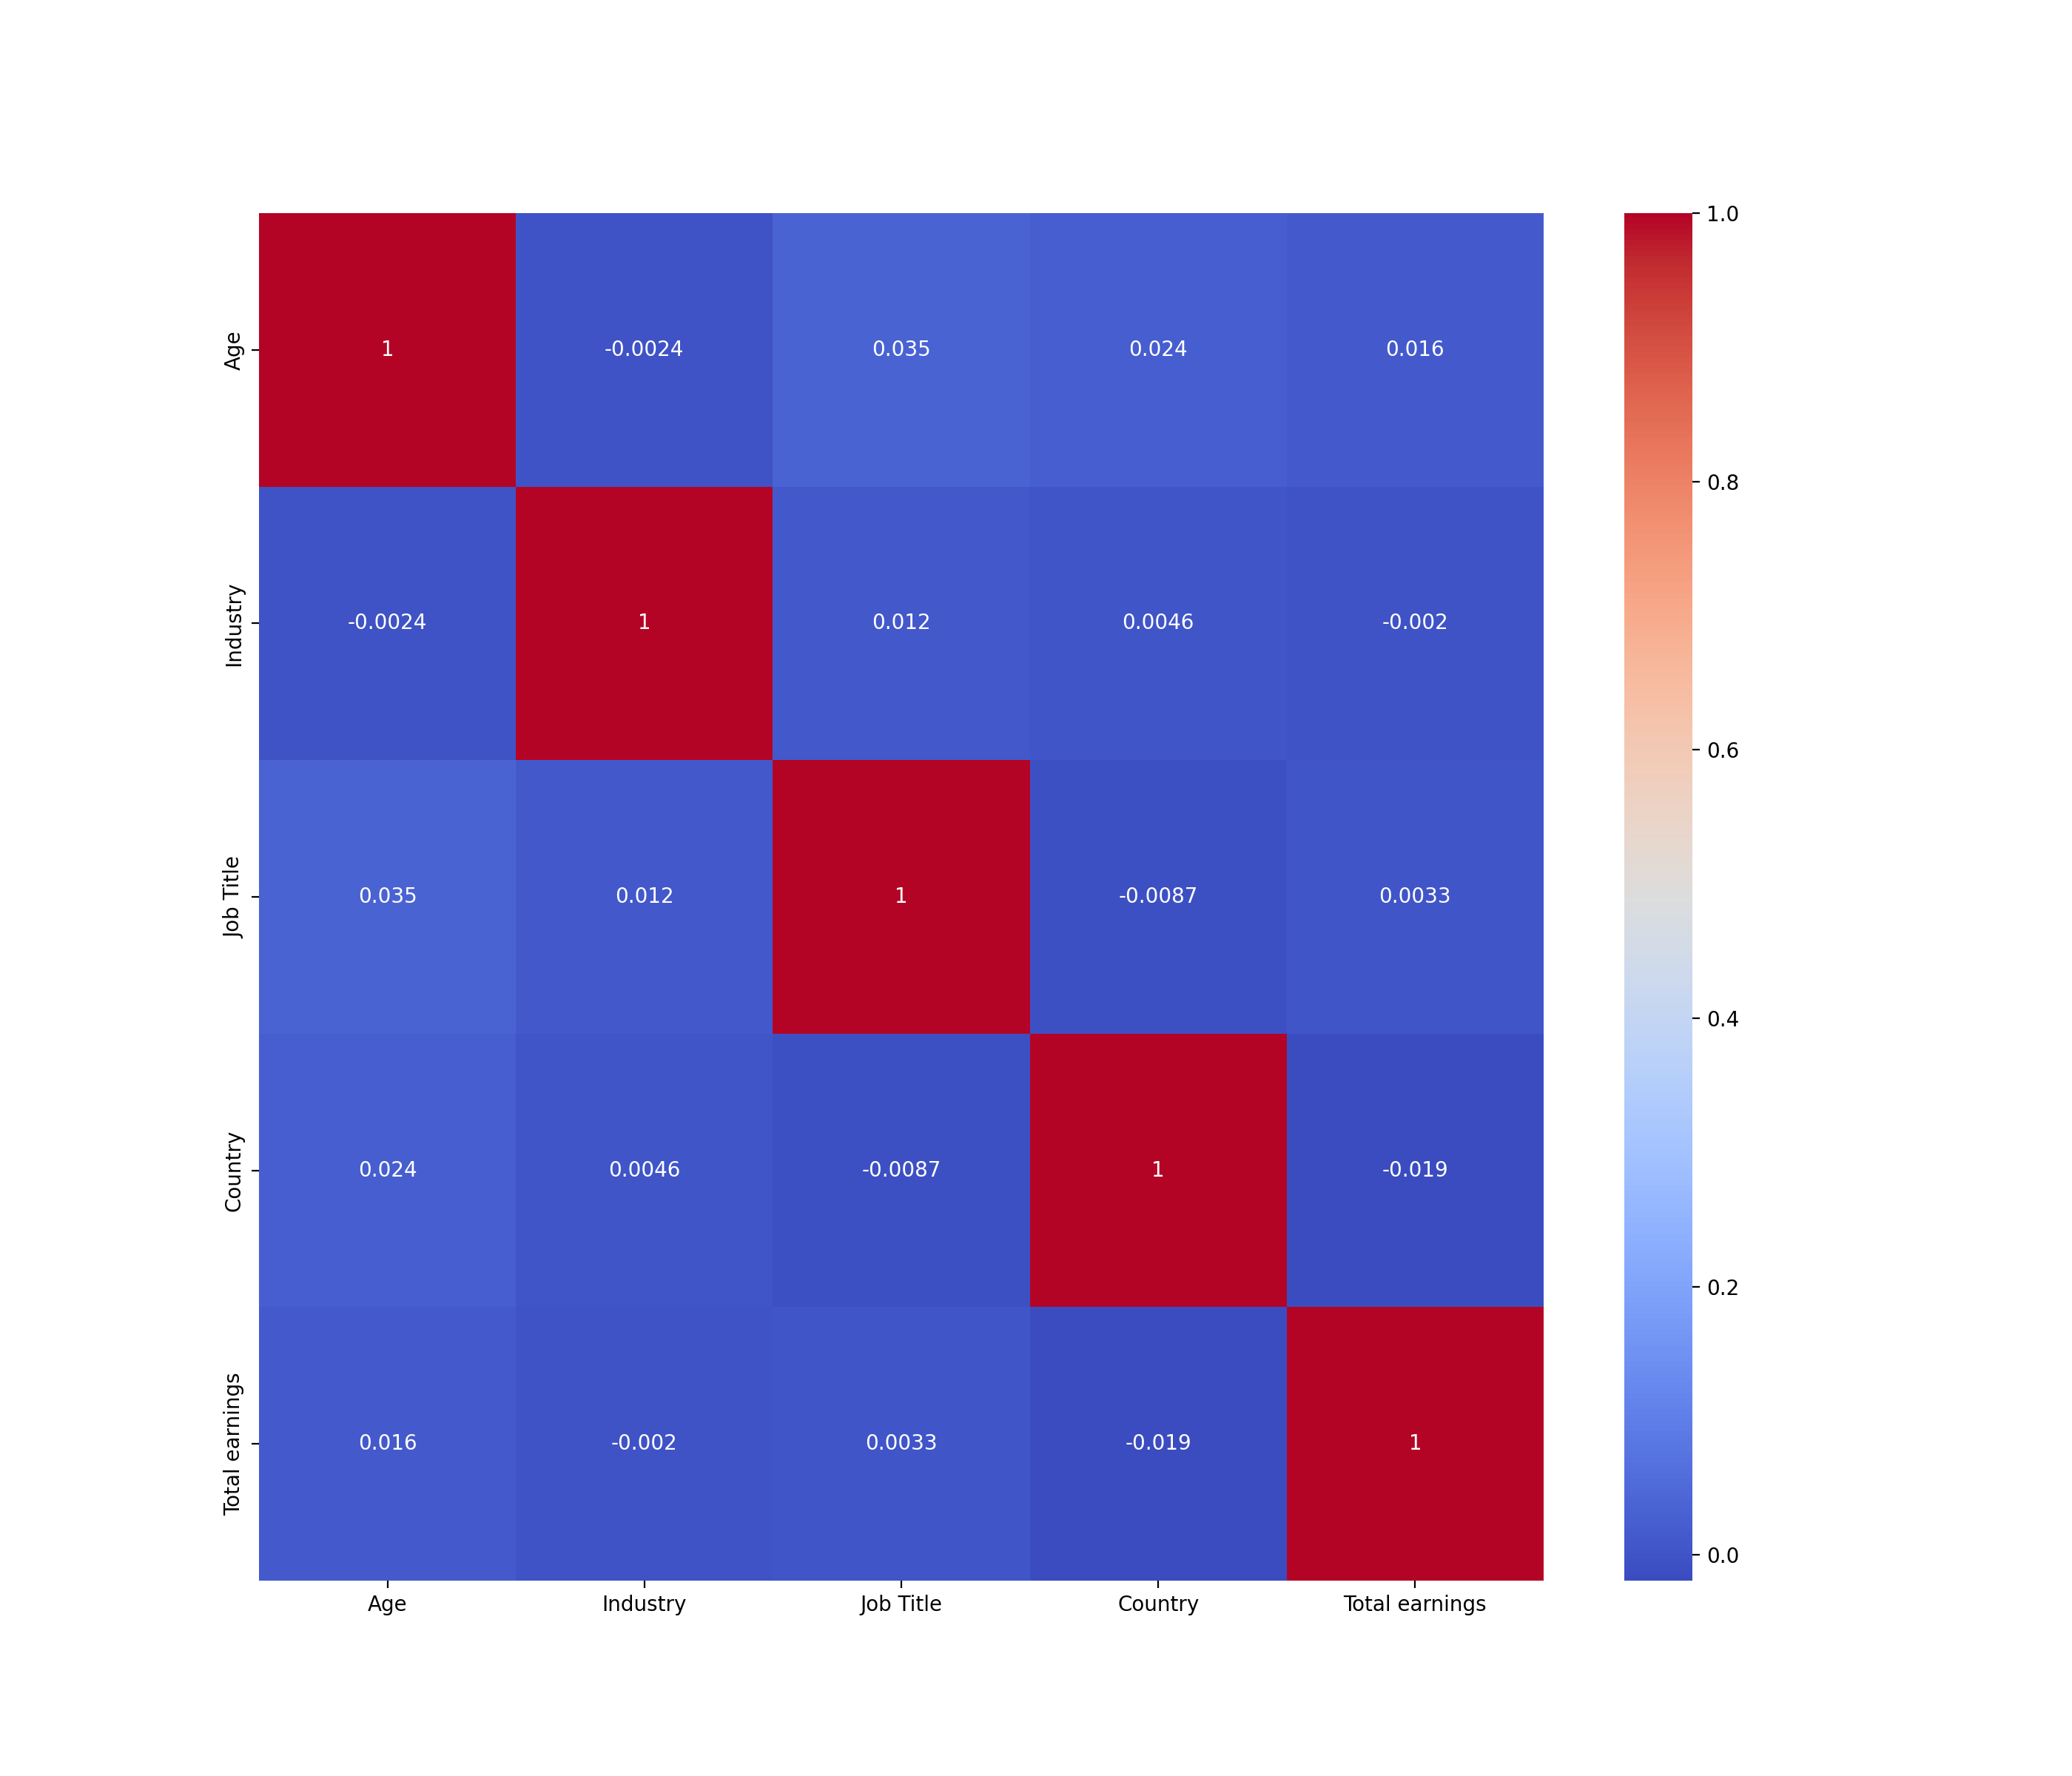

In [ ]:
data2 = data.copy()

le = LabelEncoder()
data2['Age'] = le.fit_transform(data2['Age'])
data2['Country'] = le.fit_transform(data2['Country'])
data2['Industry'] = le.fit_transform(data2['Industry'])
data2['Job Title'] = le.fit_transform(data2['Job Title'])


# Dropping the non-numeric columns
data2.drop(columns=['Gender','Work experience in field', 'Work experience', 'Cleaned Race', 'Education'], axis=1, inplace=True)

# Compute correlation matrix
correlation_matrix = data2.corr()

# Generate a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data.head()


,Age,Industry,Job Title,Country,Work experience,Work experience in field,Education,Gender,Total earnings,Cleaned Race
0,25-34,Education (Higher Education),RESEARCH,USA,5-7 years,5-7 years,Master's degree,Woman,55000.0,White
1,25-34,Computing or Tech,MANAGER,UNITED KINGDOM,8 - 10 years,5-7 years,College degree,Non-binary,58600.0,White
2,25-34,"Accounting, Banking & Finance",SPECIALIST,USA,2 - 4 years,2 - 4 years,College degree,Woman,34000.0,White
3,25-34,Nonprofits,MANAGER,USA,8 - 10 years,5-7 years,College degree,Woman,65000.0,White
4,25-34,"Accounting, Banking & Finance",MANAGER,USA,8 - 10 years,5-7 years,College degree,Woman,67000.0,White


In [ ]:


data4 = data.copy()

le = LabelEncoder()
data4['Age'] = le.fit_transform(data4['Age'])
data4['Industry'] = le.fit_transform(data4['Industry'])
data4['Work experience'] = le.fit_transform(data4['Work experience'])
data4['Cleaned Race'] = le.fit_transform(data4['Cleaned Race'])

X = data4[['Age', 'Industry', 'Work experience', 'Cleaned Race']]
y = data4['Total earnings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)




In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coeff:", model.coef_)

Coeff: [ 1.67974260e+05 -1.00039394e+02  1.64900291e+04 -2.46260424e+04]


In [ ]:
y_hat_test = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_hat_test)

y_hat_train = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_hat_train)


print(f'Train MSE: {train_mse} Test MSE {test_mse}')

# 2940696833.370457

Train MSE: 53400929205301.73 Test MSE 1800000753980.8435


## DecisionTree Regressor

In [ ]:
X = data.drop(["Total earnings","Job Title"], axis=1)
cat_features = X.columns.to_numpy()

X = pd.get_dummies(data=X, columns=cat_features, drop_first=True)
y = data["Total earnings"].copy()

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train,y_train)

tree_y_pred_test = tree_reg1.predict(X_test)
tree_y_pred_train = tree_reg1.predict(X_train)

# The train mean squared error
print("Train Mean squared error: %.2f" % mean_squared_error(y_train, tree_y_pred_train))
# The mean squared error
print("Test Mean squared error: %.2f" % mean_squared_error(y_test, tree_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, tree_y_pred_test))

Train Mean squared error: 691273697268.53
Test Mean squared error: 120189544625456.73
Coefficient of determination: 0.32


DecisionTree Regessor Attempt 2

In [ ]:
print(f"There are: {len(data['Job Title'].unique())} unique job titles")
print(f"There are: {len(data['Industry'].unique())} unique industries")
print(f"There are: {len(data['Country'].unique())} unique countries")

There are: 1001 unique job titles
There are: 1206 unique industries
There are: 216 unique countries


In [ ]:
X = data.drop(["Total earnings", "Job Title", 'Industry', 'Country'], axis=1)
cat_features = X.columns.to_numpy()

X = pd.get_dummies(data=X, columns=cat_features, drop_first=True)
y = data["Total earnings"].copy()

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train,y_train)

tree_y_pred_test = tree_reg2.predict(X_test)
tree_y_pred_train = tree_reg2.predict(X_train)

# The train mean squared error
print("Train Mean squared error: %.2f" % mean_squared_error(y_train, tree_y_pred_train))
# The mean squared error
print("Test Mean squared error: %.2f" % mean_squared_error(y_test, tree_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, tree_y_pred_test))

Train Mean squared error: 2894036891319.38
Test Mean squared error: 178025971723907.16
Coefficient of determination: -0.00


### Decision Tree Hyperparameter Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


X = data.drop(["Total earnings", "Job Title"], axis=1)
cat_features = X.columns.to_numpy()

X = pd.get_dummies(data=X, columns=cat_features, drop_first=True)
y = data["Total earnings"].copy()

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


param_dist = {
    'max_depth': np.arange(3, 50),       # Range of values for the maximum depth of the tree
    'min_samples_split': np.arange(2, 11),  # Range of values for the minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),   # Range of values for the minimum number of samples required to be at a leaf node
}

dtr = DecisionTreeRegressor(max_depth=2, random_state=42)

random_search_dt = RandomizedSearchCV(dtr, param_distributions=param_dist, 
                                n_iter=100, cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=42, 
                                verbose=1)


random_search_dt.fit(X_train, y_train)
print("Best Hyperparameters")
print(random_search_dt.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters
{'min_samples_split': 4, 'min_samples_leaf': 12, 'max_depth': 3}


In [ ]:
tree_y_pred_test = random_search_dt.predict(X_test)
tree_y_pred_train = random_search_dt.predict(X_train)

# The train mean squared error
print("Train Mean squared error: %.2f" % mean_squared_error(y_train, tree_y_pred_train))
# The mean squared error
print("Test Mean squared error: %.2f" % mean_squared_error(y_test, tree_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, tree_y_pred_test))


Train Mean squared error: 2861339085501.99
Test Mean squared error: 178036443760815.28
Coefficient of determination: -0.00


# Random Forest 

In [ ]:
X = data.drop(["Total earnings", "Job Title", 'Industry', 'Country'], axis=1)
cat_features = X.columns.to_numpy()

X = pd.get_dummies(data=X, columns=cat_features, drop_first=True)
y = data["Total earnings"].copy()

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_tree_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_tree_reg.fit(X_train,y_train)

tree_y_pred_test = random_tree_reg.predict(X_test)
tree_y_pred_train = random_tree_reg.predict(X_train)

# The train mean squared error
print("Train Mean squared error: %.2f" % mean_squared_error(y_train, tree_y_pred_train))
# The mean squared error
print("Test Mean squared error: %.2f" % mean_squared_error(y_test, tree_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, tree_y_pred_test))


# 178,036,443,760,815.2
# 4,143,215,237,360.87

Train Mean squared error: 50307972857244.80
Test Mean squared error: 4143215237360.87
Coefficient of determination: -11.84


### Random Forest Hyperparameter Search 

In [ ]:
X = data.drop(["Total earnings", "Job Title", 'Industry', 'Country'], axis=1)
cat_features = X.columns.to_numpy()

X = pd.get_dummies(data=X, columns=cat_features, drop_first=True)
y = data["Total earnings"].copy()

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


param_dist = {
    'n_estimators': np.arange(50, 1000),
    'max_depth': np.arange(3, 50),       # Range of values for the maximum depth of the tree
    'min_samples_split': np.arange(2, 11),  # Range of values for the minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),   # Range of values for the minimum number of samples required to be at a leaf node
}

rfr = RandomForestRegressor()

random_search_rfr = RandomizedSearchCV(rfr, param_distributions=param_dist, 
                                n_iter=20, cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=42, 
                                verbose=1)


random_search_rfr.fit(X_train, y_train)
print("Best Hyperparameters")
print(random_search_rfr.best_params_) # {'n_estimators': 874, 'min_samples_split': 9, 'min_samples_leaf': 19, 'max_depth': 9}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters
{'n_estimators': 874, 'min_samples_split': 9, 'min_samples_leaf': 19, 'max_depth': 9}


In [ ]:
rfr = RandomForestRegressor(n_estimators=874, min_samples_split=9, min_samples_leaf=19, max_depth=9)
rfr.fit(X_train, y_train)
tree_y_pred_test = rfr.predict(X_test)
tree_y_pred_train = rfr.predict(X_train)

# The train mean squared error
print("Train Mean squared error: %.2f" % mean_squared_error(y_train, tree_y_pred_train))
# The mean squared error
print("Test Mean squared error: %.2f" % mean_squared_error(y_test, tree_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, tree_y_pred_test))


# 178,036,443,760,815.2
# 4,143,215,237,360.87
# 178,058,735,323,663.19

Train Mean squared error: 2799671734102.19
Test Mean squared error: 178056115719761.72
Coefficient of determination: -0.00


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X = data.drop(["Total earnings", 'Industry', 'Country'], axis=1)
cat_features = X.columns.to_numpy()

X = pd.get_dummies(data=X, columns=cat_features, drop_first=True)
y = data["Total earnings"].copy()

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)


tree_y_pred_test = knn_regressor.predict(X_test)
tree_y_pred_train = knn_regressor.predict(X_train)

# The train mean squared error
print("Train Mean squared error: %.2f" % mean_squared_error(y_train, tree_y_pred_train))
# The mean squared error
print("Test Mean squared error: %.2f" % mean_squared_error(y_test, tree_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, tree_y_pred_test))

Train Mean squared error: 2291034630190.74
Test Mean squared error: 178160510967380.25
Coefficient of determination: -0.00


In [ ]:
###

In [ ]:
# Nearest Neighbors Classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_encoded, y_encoded)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# We perform a prediction with this data
print(data_prep.iloc[1])
print(data.iloc[1]["Total"])

Age                                                       45-54
Industry                                            Health care
Job Title                                             EXECUTIVE
Country                                               ARGENTINA
Work experience                                   11 - 20 years
Work experience in field                          11 - 20 years
Education                                        College degree
Gender                                                    Woman
Race                        Hispanic, Latino, or Spanish origin
Name: 603, dtype: object
4782.01


In [ ]:
#! pip uninstall scikit-learn -y
#! pip install scikit-learn==1.2.2
#! pip show scikit-learn

In [ ]:
pred = np.array(x_encoded.iloc[1])
knn.predict(pred.reshape(1,-1))

/home/balika/dst1_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


array([[0, 0, 0, 0, 0, 0]], dtype=uint8)

As it can be seen in the prediction, this model does not work correctly for wages that fall outside the brackets of taxes for the US. 
The annual salary for a healthcare manager in Argentina is 4782 USD. This is far below the expected value, which is within 95375 and 182100 USD. 
The prediction model fails to account for these differences.
Now another test can be done with an observation of wages in the US, or with wages similar to the US

In [ ]:
print(data_prep.iloc[3])
print(data.iloc[3]["Total"])
print(y_encoded.iloc[3])

Age                                                  35-44
Industry                    Intergovernmental organization
Job Title                                       CONSULTANT
Country                                        SWITZERLAND
Work experience                              11 - 20 years
Work experience in field                         5-7 years
Education                                  Master's degree
Gender                                               Woman
Race                             Black or African American
Name: 1840, dtype: object
68982.0
['Total']_(11000.0, 44725.0]      0
['Total']_(44725.0, 95375.0]      1
['Total']_(95375.0, 182100.0]     0
['Total']_(182100.0, 231250.0]    0
['Total']_(231250.0, 578125.0]    0
['Total']_(578125.0, inf]         0
Name: 1840, dtype: uint8


In [ ]:
pred = np.array(x_encoded.iloc[3])
knn.predict(pred.reshape(1,-1))

/home/balika/dst1_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


array([[0, 1, 0, 0, 0, 0]], dtype=uint8)

As it can be seen, the prediction was a success for a person in a country with wages similar to the US
Afterwards, a comparison can be made with every observation available in the dataset

In [ ]:
pred_res = knn.predict(x_encoded)
actual_vals = y_encoded.values
comparison = pred_res == actual_vals
#print(comparison)
results = {True: 0, False: 0}
for c in comparison:
    if False in c:
        results[False]+=1
    else:
        results[True]+=1
print(results)


{True: 102, False: 57}


In [ ]:
success_rate = results[True] / (results[True] + results[False])
print(success_rate)

0.6415094339622641


As we can see, this simple model has a 60% succcess rate

## Random Fores

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_encoded, y_encoded)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# We perform a prediction with this data
print(data_prep.iloc[1])
print(data.iloc[1]["Total"])

Age                                                       45-54
Industry                                            Health care
Job Title                                             EXECUTIVE
Country                                               ARGENTINA
Work experience                                   11 - 20 years
Work experience in field                          11 - 20 years
Education                                        College degree
Gender                                                    Woman
Race                        Hispanic, Latino, or Spanish origin
Name: 603, dtype: object
4782.01


In [ ]:
pred = np.array(x_encoded.iloc[1])
clf.predict(pred.reshape(1,-1))

/home/balika/dst1_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
# We perform a prediction with this data
print(data_prep.iloc[3])
print(data.iloc[3]["Total"])

Age                                                  35-44
Industry                    Intergovernmental organization
Job Title                                       CONSULTANT
Country                                        SWITZERLAND
Work experience                              11 - 20 years
Work experience in field                         5-7 years
Education                                  Master's degree
Gender                                               Woman
Race                             Black or African American
Name: 1840, dtype: object
68982.0


In [ ]:
pred = np.array(x_encoded.iloc[3])
clf.predict(pred.reshape(1,-1))

/home/balika/dst1_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
clf.predict(x_encoded)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 